In [2]:
# Importing Important Libraries

# Data Analysis and Visualization Libraries
import os, sys
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from tqdm import tqdm
import missingno as msno
from collections import Counter
import random as rn
from functools import reduce 
# import researchpy as rp

# Statistical Libraries
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Importing sklearn libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Library to Display whole Dataset.
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)


# Import and suppress warnings
import warnings
warnings.filterwarnings("ignore")

# 1)Loading Dataset

In [3]:
data = pd.read_csv("Bengaluru_House_Data.csv", encoding_errors="replace")

###### Print top 5 rows in the dataframe.

###### Print top 5 rows in the dataframe.

In [4]:
data.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony      price  
0  Coomee        1056   2.0      1.0    $39.07   
1  Theanmp       2600   5.0      3.0   $120.00   
2      NaN       1440   2.0      3.0    $62.00   
3  Soiewre       1521   3.0      1.0    $95.00   
4      NaN       1200   2.0      1.0    $51.00

# 2) Data Description

### a) Features of data:

1. area_type: The area size mentioned in total_sqft is “Built-up Area”,” Super built-up Area”,” Plot Area” or “Carpet Area”

2. availability: By when it will be ready

3. location: Where is it located in Bengaluru

4. size: in BHK

5. Society: Name of society which it is part of

6. total_sqft: area in square feet

7. bath: Number of bathrooms

8. balcony: Number of Balconies

9. price: cost of property 

### b) Computing the size of DataFrame

In [5]:
print(f"The shape of the Dataset : {data.shape}")
print(f"Attrition Dataset: Rows= {data.shape[0]}, Columns= {data.shape[1]}")

The shape of the Dataset : (13320, 9)
Attrition Dataset: Rows= 13320, Columns= 9


In [6]:
print(f"Shape of the data : {data.shape}")
print(f"No. of data points : {data.shape[0]}")
print(f"Number of features in the data : {data.shape[1]}")
print("*******************************************************************")
print(f"Attributes in the data : {data.columns}")

Shape of the data : (13320, 9)
No. of data points : 13320
Number of features in the data : 9
*******************************************************************
Attributes in the data : Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


### c) Enlist the Column Labels

In [7]:
print("Column labels in the dataset in column order:")
for column in data.columns:
    print(column)

Column labels in the dataset in column order:
area_type
availability
location
size
society
total_sqft
bath
balcony
price


### d) Generating Basic Information of Attributes

In [8]:
# Print the Long summary of the dataframe by setting verbose = True
# Check for Non-Null or Nan Nalues in the dataset.
print(data.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB
None


* There are 13320 samples with 9 features.
* Price in our data is in object data type, but it should be in numerical type.

### d) Checking duplicate values

In [9]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {data.duplicated().sum()}")

The total number of duplicated observations in the dataset: 511


In [10]:
dups = data.duplicated()
print("No of duplicate rows = %d" %(dups.sum()))
data[dups].head()

No of duplicate rows = 511


area_type   availability      location   size  society  \
971   Super built-up  Area  Ready To Move  Haralur Road  3 BHK  NRowse    
1115  Super built-up  Area  Ready To Move  Haralur Road  2 BHK      NaN   
1143  Super built-up  Area  Ready To Move   Vittasandra  2 BHK  Prlla C   
1290  Super built-up  Area  Ready To Move  Haralur Road  2 BHK      NaN   
1394  Super built-up  Area  Ready To Move  Haralur Road  2 BHK      NaN   

     total_sqft  bath  balcony price  
971        1464   3.0      2.0    56  
1115       1027   2.0      2.0    44  
1143       1246   2.0      1.0  64.5  
1290       1194   2.0      2.0    47  
1394       1027   2.0      2.0    44

### e) Checking Number of Unique Values for each variables

In [11]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in data.columns:
    print(f"'{i}' : {data[i].nunique()}")

The number of unique values in: 
-----------------------------------
'area_type' : 4
'availability' : 81
'location' : 1305
'size' : 31
'society' : 2688
'total_sqft' : 2117
'bath' : 19
'balcony' : 4
'price' : 2205


### f) Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print(f"The unique values in: ")
print("-"*35)
for i in data.columns:
    print(f"'{i}' : {data[i].unique()}")
    print("-"*50)

The unique values in: 
-----------------------------------
'area_type' : ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
--------------------------------------------------
'availability' : ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
---------------------------

In [13]:
# Check Unique Values for each variable.
print(f"The unique values in: ")
print("-"*35)
for i in data.columns:
    print(f"'{i}' : {data[i].value_counts()}")
    print("-"*50)

The unique values in: 
-----------------------------------
'area_type' : area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------------------------------------
'availability' : availability
Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-S

In [14]:
# Check Unique Values percent for each variable.
print(f"The unique values in: ")
print("-"*35)
for i in data.columns:
    print(f"'{i}' : {data[i].value_counts()/data.shape[0]*100}")
    print("-"*50)

The unique values in: 
-----------------------------------
'area_type' : area_type
Super built-up  Area    65.990991
Built-up  Area          18.153153
Plot  Area              15.202703
Carpet  Area             0.653153
Name: count, dtype: float64
--------------------------------------------------
'availability' : availability
Ready To Move           79.436937
18-Dec                   2.304805
18-May                   2.214715
18-Apr                   2.034535
18-Aug                   1.501502
19-Dec                   1.388889
18-Jul                   1.073574
18-Mar                   0.983483
18-Jun                   0.743243
20-Dec                   0.735736
21-Dec                   0.698198
19-Mar                   0.660661
18-Feb                   0.465465
18-Nov                   0.352853
18-Jan                   0.322823
18-Sep                   0.307808
19-Jun                   0.300300
18-Oct                   0.292793
19-Jan                   0.292793
19-Jul                   0

'price' : 75            2.274775
65            2.177177
55            2.027027
60            1.959459
45            1.779279
50            1.734234
70            1.516517
85            1.493994
90            1.478979
80            1.373874
110           1.321321
95            1.306306
150           1.306306
100           1.283784
40            1.238739
120           1.231231
125           1.171171
130           1.006006
58            0.983483
35            0.915916
42            0.915916
48            0.908408
56            0.885886
46            0.870871
52            0.855856
115           0.848348
140           0.818318
68            0.818318
160           0.788288
200           0.758258
62            0.758258
78            0.653153
57            0.623123
47            0.615616
72            0.615616
135           0.608108
180           0.600601
105           0.600601
44            0.593093
250           0.525526
300           0.525526
38            0.518018
53            0.510511
6

### g) Checking duplicate values

In [15]:
# Dataset Duplicate Value Count
print(f"The total number of duplicated observations in the dataset: {data.duplicated().sum()}")

The total number of duplicated observations in the dataset: 511


In [16]:
dups = data.duplicated()
print("No of duplicate rows = %d" %(dups.sum()))
data[dups].head()

No of duplicate rows = 511


area_type   availability      location   size  society  \
971   Super built-up  Area  Ready To Move  Haralur Road  3 BHK  NRowse    
1115  Super built-up  Area  Ready To Move  Haralur Road  2 BHK      NaN   
1143  Super built-up  Area  Ready To Move   Vittasandra  2 BHK  Prlla C   
1290  Super built-up  Area  Ready To Move  Haralur Road  2 BHK      NaN   
1394  Super built-up  Area  Ready To Move  Haralur Road  2 BHK      NaN   

     total_sqft  bath  balcony price  
971        1464   3.0      2.0    56  
1115       1027   2.0      2.0    44  
1143       1246   2.0      1.0  64.5  
1290       1194   2.0      2.0    47  
1394       1027   2.0      2.0    44

### h) Checking Missing Values

In [17]:
# Missing Values/Null Values Count

print('Is there any missing value present or not?',data.isnull().values.any())
print("-"*50)
missing_percentage = data.isnull().sum()/len(data)*100
missing_percentage_sort = missing_percentage.sort_values(ascending=False)
missing_value_df1 = pd.DataFrame({'missing_count': data.isnull().sum().sort_values(ascending=False),
                                 'missing_percentage': missing_percentage_sort})
print("Null value count in each of the variable: ")
print("-"*50)
missing_value_df1

Is there any missing value present or not? True
--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------


missing_count  missing_percentage
society                5502           41.306306
balcony                 609            4.572072
bath                     73            0.548048
size                     16            0.120120
location                  1            0.007508
area_type                 0            0.000000
availability              0            0.000000
total_sqft                0            0.000000
price                     0            0.000000

In [18]:
missing_value_df1[missing_value_df1.missing_count != 0]

missing_count  missing_percentage
society            5502           41.306306
balcony             609            4.572072
bath                 73            0.548048
size                 16            0.120120
location              1            0.007508

* As feature society have 41.31 percent missing values we will drop this column.

<Axes: >

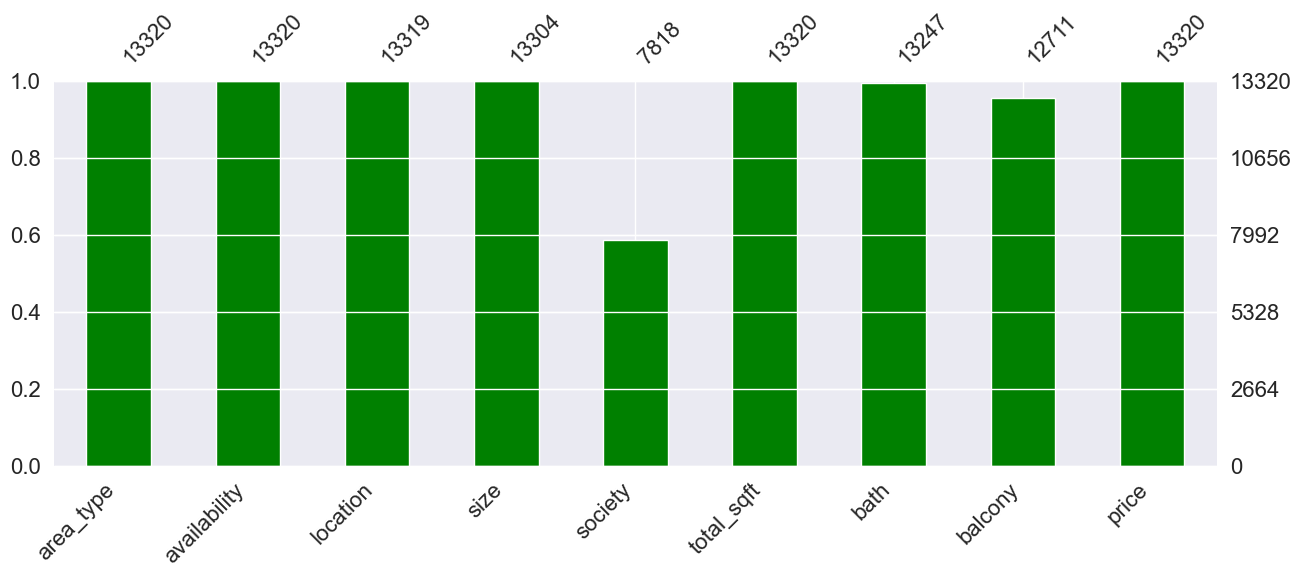

In [19]:
# Visualizing the missing values
msno.bar(data,figsize=(15,5), color="green")

### i) Statistical Analysis of Dataset

In [20]:
data.describe(include='all').T

count unique                   top   freq      mean       std  \
area_type       13320      4  Super built-up  Area   8790       NaN       NaN   
availability    13320     81         Ready To Move  10581       NaN       NaN   
location        13319   1305            Whitefield    540       NaN       NaN   
size            13304     31                 2 BHK   5199       NaN       NaN   
society          7818   2688               GrrvaGr     80       NaN       NaN   
total_sqft      13320   2117                  1200    843       NaN       NaN   
bath          13247.0    NaN                   NaN    NaN   2.69261  1.341458   
balcony       12711.0    NaN                   NaN    NaN  1.584376  0.817263   
price           13320   2205                    75    303       NaN       NaN   

              min  25%  50%  75%   max  
area_type     NaN  NaN  NaN  NaN   NaN  
availability  NaN  NaN  NaN  NaN   NaN  
location      NaN  NaN  NaN  NaN   NaN  
size          NaN  NaN  NaN  NaN   NaN  
society       NaN  NaN  NaN  NaN   NaN  
total_sqft    NaN  NaN  NaN  NaN   NaN  
bath          1.0  2.0  2.0  3.0  40.0  
balcony       0.0  1.0  2.0  2.0   3.0  
price         NaN  NaN  NaN  NaN   NaN

# 3) Data Wrangling



In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


### a) Data Wrangling area_type

In [22]:
data["area_type"].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [23]:
len(data["area_type"].value_counts())

4

In [24]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [25]:
data.groupby('area_type').first()

availability                  location       size  \
area_type                                                                  
Built-up  Area        Ready To Move               Uttarahalli      3 BHK   
Carpet  Area          Ready To Move         Maruthi Sevanagar      2 BHK   
Plot  Area            Ready To Move          Chikka Tirupathi  4 Bedroom   
Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   

                      society total_sqft  bath  balcony      price  
area_type                                                           
Built-up  Area        Kantsce       1440   2.0      3.0    $62.00   
Carpet  Area          SMikaay        950   2.0      2.0         47  
Plot  Area            Theanmp       2600   5.0      3.0   $120.00   
Super built-up  Area  Coomee        1056   2.0      1.0    $39.07

In [26]:
data.groupby('area_type').agg('count')

availability  location  size  society  total_sqft  bath  \
area_type                                                                       
Built-up  Area                2418      2418  2418     1215        2418  2410   
Carpet  Area                    87        87    87       54          87    87   
Plot  Area                    2025      2025  2009      311        2025  2009   
Super built-up  Area          8790      8789  8790     6238        8790  8741   

                      balcony  price  
area_type                             
Built-up  Area           2310   2418  
Carpet  Area               82     87  
Plot  Area               1837   2025  
Super built-up  Area     8482   8790

### b) Data Wrangling on availability

In [27]:
data["availability"].value_counts().head()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
Name: count, dtype: int64

In [28]:
data["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [29]:
def fcnRelabelAvailability(x):
    values = x.split("-")
    try:
        if len(values) > 1:
            return "Soon to be Vacated"
        else:
            return x
    except:
            return ""
        
data["availability"] = data["availability"].apply(fcnRelabelAvailability)

In [30]:
data["availability"].unique()

array(['Soon to be Vacated', 'Ready To Move', 'Immediate Possession'],
      dtype=object)

### c) Data Wrangling location

In [31]:
data["location"].value_counts()

location
Whitefield                                            540
Sarjapur  Road                                        399
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
Yelahanka                                             213
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     152
Hennur Road                                           152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bella

In [32]:
data["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [33]:
data["location"].nunique()

1305

In [34]:
missing_value = data.isnull().sum()
missing_percent = data.isnull().sum()/data.shape[0]*100
missing_percent = missing_percent.sort_values(ascending=False)
missing = pd.DataFrame({"Missing_count": missing_value.sort_values(ascending=False), "Missing_percent":missing_percent})
missing

Missing_count  Missing_percent
society                5502        41.306306
balcony                 609         4.572072
bath                     73         0.548048
size                     16         0.120120
location                  1         0.007508
area_type                 0         0.000000
availability              0         0.000000
total_sqft                0         0.000000
price                     0         0.000000

In [35]:
data["location"].mode()

0    Whitefield
Name: location, dtype: object

In [36]:
# Checking where null value present
data[pd.isnull(data["location"])]

area_type   availability location   size  society total_sqft  \
568  Super built-up  Area  Ready To Move      NaN  3 BHK  Grare S       1600   

     bath  balcony price  
568   3.0      2.0    86

* As here we can see location is nan where society is Grare S, So let's explore there.

In [37]:
# checking society where nan location is present
data[data["society"] == "Grare S"]

area_type   availability    location   size  society  \
568    Super built-up  Area  Ready To Move         NaN  3 BHK  Grare S   
12238          Carpet  Area  Ready To Move  Anantapura  3 BHK  Grare S   

      total_sqft  bath  balcony price  
568         1600   3.0      2.0    86  
12238       1600   3.0      2.0    77

* From the above we can see that Grare S society is at Anantapura, but, if we have mode here is Whitefield.
* As Grare S society can't be at Whitefield.

In [38]:
# Filling nan location
data["location"] =  data["location"].replace(to_replace = np.nan, value = "Anantapura")

In [39]:
data[data["society"] == "Grare S"]

area_type   availability    location   size  society  \
568    Super built-up  Area  Ready To Move  Anantapura  3 BHK  Grare S   
12238          Carpet  Area  Ready To Move  Anantapura  3 BHK  Grare S   

      total_sqft  bath  balcony price  
568         1600   3.0      2.0    86  
12238       1600   3.0      2.0    77

In [40]:
missing_value = data.isnull().sum()
missing_percent = data.isnull().sum()/data.shape[0]*100
missing_percent = missing_percent.sort_values(ascending=False)
missing = pd.DataFrame({"Missing_count": missing_value.sort_values(ascending=False), "Missing_percent":missing_percent})
missing

Missing_count  Missing_percent
society                5502        41.306306
balcony                 609         4.572072
bath                     73         0.548048
size                     16         0.120120
area_type                 0         0.000000
availability              0         0.000000
location                  0         0.000000
total_sqft                0         0.000000
price                     0         0.000000

In [41]:
data.location.value_counts().head()

location
Whitefield         540
Sarjapur  Road     399
Electronic City    302
Kanakpura Road     273
Thanisandra        234
Name: count, dtype: int64

In [42]:
# stripping space
# data["location"] = data["location"].apply(lambda x: x.strip())
unique_location_count = data.groupby("location")["location"].agg("count").sort_values(ascending = False)
unique_location_count.head()

location
Whitefield         540
Sarjapur  Road     399
Electronic City    302
Kanakpura Road     273
Thanisandra        234
Name: location, dtype: int64

In [43]:
# Checking locations having count less than 10
unique_location_count_10 = unique_location_count[unique_location_count <= 10]
unique_location_count_10.head()

location
Naganathapura           10
Nagadevanahalli         10
Dodsworth Layout        10
Dairy Circle            10
Nagappa Reddy Layout    10
Name: location, dtype: int64

In [44]:
# location having count less than 10
data["location"] = data["location"].apply(lambda x : "Other" if x in unique_location_count_10 else x)

In [45]:
print(f"Unique values in location : {data.location.unique()}")
print("*"*100)
print(f"Number of unique values in location : {data.location.nunique()}")
print("*"*100)
print(f"Value_Counts of location after changing location count less than 10 to Other : {data.location.value_counts().head()}")

Unique values in location : ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli'
 'Lingadheeranahalli' 'Kothanur' 'Whitefield' 'Old Airport Road'
 'Rajaji Nagar' 'Marathahalli' 'Other' '7th Phase JP Nagar' 'Gottigere'
 'Sarjapur' 'Mysore Road' 'Bisuvanahalli' 'Raja Rajeshwari Nagar'
 'Kengeri' 'Binny Pete' 'Thanisandra' 'Bellandur' 'Electronic City'
 'Ramagondanahalli' 'Yelahanka' 'Hebbal' 'Kasturi Nagar' 'Kanakpura Road'
 'Electronics City Phase 1' 'Kundalahalli' 'Chikkalasandra'
 'Murugeshpalya' 'Sarjapur  Road' 'HSR Layout' 'Doddathoguru' 'KR Puram'
 'Bhoganhalli' 'Lakshminarayana Pura' 'Begur Road' 'Devanahalli' 'Varthur'
 'Bommanahalli' 'Gunjur' 'Hegde Nagar' 'Haralur Road' 'Hennur Road'
 'Kothannur' 'Kalena Agrahara' 'Kaval Byrasandra' 'ISRO Layout'
 'Garudachar Palya' 'EPIP Zone' 'Dasanapura' 'Kasavanhalli' 'Sanjay nagar'
 'Domlur' 'Sarjapura - Attibele Road' 'Yeshwanthpur' 'Chandapura'
 'Nagarbhavi' 'Ramamurthy Nagar' 'Malleshwaram' 'Akshaya Nagar' 'Shampura'
 'Kadugodi

### d) Data Wrangling size

In [46]:
print("Unique values in feature size")
print("*"*50)
data["size"].unique()


Unique values in feature size
**************************************************


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [47]:
print("Number of unique values in feature size")
print("*"*50)
data["size"].nunique()


Number of unique values in feature size
**************************************************


31

In [48]:
# Checking rows where null value present
print("Null values present in feature size")
print("*"*100)
data[pd.isnull(data["size"])]


Null values present in feature size
****************************************************************************************************


area_type          availability        location size  society  \
579    Plot  Area  Immediate Possession  Sarjapur  Road  NaN  Asiss B   
1775   Plot  Area  Immediate Possession           Other  NaN  Orana N   
2264   Plot  Area  Immediate Possession    Banashankari  NaN      NaN   
2809   Plot  Area  Immediate Possession  Sarjapur  Road  NaN  AsdiaAr   
2862   Plot  Area  Immediate Possession     Devanahalli  NaN  Ajleyor   
5333   Plot  Area  Immediate Possession     Devanahalli  NaN  Emngs S   
6423   Plot  Area  Immediate Possession      Whitefield  NaN  SRniaGa   
6636   Plot  Area  Immediate Possession          Jigani  NaN  S2enste   
6719   Plot  Area  Immediate Possession         Hoskote  NaN  SJowsn    
7680   Plot  Area  Immediate Possession    Kasavanhalli  NaN      NaN   
8306   Plot  Area  Immediate Possession          Anekal  NaN  Vaensnd   
8565   Plot  Area  Immediate Possession           Other  NaN  Ocezes    
8703   Plot  Area  Immediate Possession     Mysore Road  NaN  Naoden    
10634  Plot  Area  Immediate Possession           Other  NaN      NaN   
11019  Plot  Area  Immediate Possession       Yelahanka  NaN  Saaveha   
11569  Plot  Area  Immediate Possession      Hosur Road  NaN  AVeldun   

        total_sqft  bath  balcony    price  
579    1200 - 2400   NaN      NaN   34.185  
1775   2000 - 5634   NaN      NaN      124  
2264          2400   NaN      NaN      460  
2809   1200 - 2400   NaN      NaN   28.785  
2862   1500 - 2400   NaN      NaN     46.8  
5333   2100 - 5405   NaN      NaN  177.115  
6423          2324   NaN      NaN    26.73  
6636          1500   NaN      NaN    25.49  
6719    800 - 2660   NaN      NaN   28.545  
7680          5000   NaN      NaN      400  
8306          1453   NaN      NaN     16.5  
8565          2000   NaN      NaN      120  
8703   1200 - 2400   NaN      NaN     42.3  
10634         1575   NaN      NaN    31.11  
11019  1200 - 1800   NaN      NaN    12.75  
11569         1350   NaN      NaN     8.44

In [49]:
# Dropping samples with 3 or more missing records
data.dropna(axis=0,  thresh = 7, inplace = True)


In [50]:
missing_value = data.isnull().sum()
missing_percent = data.isnull().sum()/data.shape[0]*100
missing_percent = missing_percent.sort_values(ascending=False)
missing = pd.DataFrame({"Missing_count": missing_value.sort_values(ascending=False), "Missing_percent":missing_percent})
missing


Missing_count  Missing_percent
society                5499        41.333434
balcony                 593         4.457306
bath                     57         0.428443
area_type                 0         0.000000
availability              0         0.000000
location                  0         0.000000
size                      0         0.000000
total_sqft                0         0.000000
price                     0         0.000000

* An ML model typically works well with only numeric values. Therefore, here, we need to extract the bedroom count value from the 'size' column.



In [51]:
#Adding the "bhk" feature extracted from size

data["bhk"] = data["size"].apply(lambda x: int(x.split(" ")[0]))


In [52]:
data.head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
1            Plot  Area       Ready To Move          Chikka Tirupathi   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   

        size  society total_sqft  bath  balcony      price  bhk  
0      2 BHK  Coomee        1056   2.0      1.0    $39.07     2  
1  4 Bedroom  Theanmp       2600   5.0      3.0   $120.00     4  
2      3 BHK      NaN       1440   2.0      3.0    $62.00     3  
3      3 BHK  Soiewre       1521   3.0      1.0    $95.00     3  
4      2 BHK      NaN       1200   2.0      1.0    $51.00     2

* In real estate bussiness, it is important how much square feet per bhk is.
* Alse it will help in detecting outliers.


### e) Data Wrangling society

In [53]:
data["society"].value_counts().head()


society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
Name: count, dtype: int64

In [54]:
data["society"].unique()


array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [55]:
data["society"].nunique()


2676

In [56]:
# Missing Value percent in feature society
data["society"].isnull().sum()/data.shape[0]*100


41.3334335538184

* As society feature contains 41.30 percent missing values, so we need to drop this feature.

### f) Data Wrangling price 


In [57]:
print(f"The value counts of price : {data.price.value_counts().head()}")

The value counts of price : price
75    303
65    290
55    270
60    261
45    237
Name: count, dtype: int64


In [58]:
# defining a function to check whether the value is float or not
def is_float(x):
    try:
        float(x)
    except :
        return False
    return True


#### Converting price to numerical type


In [59]:
print("price data points which are not float")
print("*"*100)
data[~data['price'].apply(is_float)].head()


price data points which are not float
****************************************************************************************************


area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
1            Plot  Area       Ready To Move          Chikka Tirupathi   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   

        size  society total_sqft  bath  balcony      price  bhk  
0      2 BHK  Coomee        1056   2.0      1.0    $39.07     2  
1  4 Bedroom  Theanmp       2600   5.0      3.0   $120.00     4  
2      3 BHK      NaN       1440   2.0      3.0    $62.00     3  
3      3 BHK  Soiewre       1521   3.0      1.0    $95.00     3  
4      2 BHK      NaN       1200   2.0      1.0    $51.00     2

In [60]:
print("Number of price data points which are not float")
print("*"*100)
len(data[~data['price'].apply(is_float)])

Number of price data points which are not float
****************************************************************************************************


338

In [73]:
# replacing anamoly values which make price data points object
data["price"] = data["price"].apply(str).str.replace("$", "")
data["price"] = data["price"].str.replace("?", "")
data["price"] = data["price"].str.replace(" ", "")
data["price"] = data["price"].str.replace("�", "")
data["price"] = data["price"].str.replace("148-150", "149")
data["price"] = data["price"].str.replace("25.25-30", "27.625")
data["price"] = data["price"].str.replace("200-250", "225")
data["price"] = data["price"].astype("float")


In [74]:
print("price data points which are not float")
print("*"*100)
data[~data['price'].apply(is_float)]


price data points which are not float
****************************************************************************************************


Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price, bhk]
Index: []

In [64]:
print("Number of price data points which are not float")
print("*"*100)

len(data[~data['price'].apply(is_float)])


Number of price data points which are not float
****************************************************************************************************


0

### g) Data Wrangling on total_sqft

#### Converting total_sqft to numerical type

In [64]:
# defining a function to check whether the value is float or not
def fcnIsFloat(x):
    try:
        float(x)
    except:
        return False
    return True


In [65]:
# Checking total_sqft datatypes

data[~data['total_sqft'].apply(fcnIsFloat)].head()

area_type        availability            location       size  \
30   Super built-up  Area  Soon to be Vacated           Yelahanka      4 BHK   
56         Built-up  Area  Soon to be Vacated         Devanahalli  4 Bedroom   
81         Built-up  Area  Soon to be Vacated         Hennur Road  4 Bedroom   
122  Super built-up  Area  Soon to be Vacated              Hebbal      4 BHK   
137  Super built-up  Area  Soon to be Vacated  8th Phase JP Nagar      2 BHK   

     society   total_sqft  bath  balcony   price  bhk  
30   LedorSa  2100 - 2850   4.0      0.0  186.00    4  
56   BrereAt  3010 - 3410   NaN      NaN  192.00    4  
81   Gollela  2957 - 3450   NaN      NaN  224.50    4  
122  SNontle  3067 - 8156   4.0      0.0  477.00    4  
137  Vaarech  1042 - 1105   2.0      0.0   54.01    2

In [66]:
# Checking how many data point are not float
len(data[~data['total_sqft'].apply(fcnIsFloat)])

239

In [68]:
data[data["total_sqft"].isnull()]

Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price, bhk]
Index: []

In [69]:
# Checking how many data point are not float
len(data[~data['total_sqft'].apply(fcnIsFloat)])

239

In [67]:
metrics = []

def fcnConvertToSqFt(x, metric):
    if metric == "Acres":
        return x * 43560
    elif metric == "Cents":
        return x * 435.6
    elif metric == "Grounds":
        return x * 2400
    elif metric == "Guntha":
        return x * 1088.98
    elif metric == "Perch":
        return x * 272.25
    elif metric == "Sq. Meter":
        return x * 10.7639
    elif metric == "Sq. Yards":
        return x * 9
    else:
        return np.nan

def fcnExtractTotalSqft(x):
    try:
        values = x.split("-")
        return np.mean(list(map(float, values)))
    except:
        if x == np.nan:
            return np.nan
        else:
            for intIndex in range(len(x)-1, -1, -1):
                if fcnIsFloat(x[0:intIndex]):
                    return fcnConvertToSqFt(float(x[0:intIndex]), x[intIndex:])
                
# # applying this function to the dataset
# data['total_sqft'] = data['total_sqft'].apply(fcnExtractTotalSqft)

In [68]:
# applying this function to the dataset
data['total_sqft'] = data['total_sqft'].apply(fcnExtractTotalSqft)
print(data['total_sqft'].head(10))
print(data.loc[30])

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
5    1170.0
6    2732.0
7    3300.0
8    1310.0
9    1020.0
Name: total_sqft, dtype: float64
area_type       Super built-up  Area
availability      Soon to be Vacated
location                   Yelahanka
size                           4 BHK
society                      LedorSa
total_sqft                    2475.0
bath                             4.0
balcony                          0.0
price                          186.0
bhk                                4
Name: 30, dtype: object


In [69]:
data[data["total_sqft"].isnull()]

Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price, bhk]
Index: []

In [70]:
data.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
bhk                0
dtype: int64

In [74]:
data[data["total_sqft"].isnull()]

Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price, bhk]
Index: []

* In real estate bussiness price per square feet is very much a essential part.
* And also it will help us detecting outliers.

In [75]:
print(f"Price per square feet : ")
print("*"*50)
data["price_per_sqft"] = data["price"] * 100000 / data["total_sqft"]
data["price_per_sqft"].head()

Price per square feet : 
**************************************************


0    3699.810606
1    4615.384615
2    4305.555556
3    6245.890861
4    4250.000000
Name: price_per_sqft, dtype: float64

In [76]:
data.head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
1            Plot  Area       Ready To Move          Chikka Tirupathi   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   

        size  society  total_sqft  bath  balcony   price  bhk  price_per_sqft  
0      2 BHK  Coomee       1056.0   2.0      1.0   39.07    2     3699.810606  
1  4 Bedroom  Theanmp      2600.0   5.0      3.0  120.00    4     4615.384615  
2      3 BHK      NaN      1440.0   2.0      3.0   62.00    3     4305.555556  
3      3 BHK  Soiewre      1521.0   3.0      1.0   95.00    3     6245.890861  
4      2 BHK      NaN      1200.0   2.0      1.0   51.00    2     4250.000000

In [77]:
##### Feature engineering on bhk


In [78]:
# Creating a new feature sqft_per_bhk which is square feet per bhk
data["sqft_per_bhk"] = data["total_sqft"] / data["bhk"]


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13304 non-null  object 
 1   availability    13304 non-null  object 
 2   location        13304 non-null  object 
 3   size            13304 non-null  object 
 4   society         7805 non-null   object 
 5   total_sqft      13304 non-null  float64
 6   bath            13247 non-null  float64
 7   balcony         12711 non-null  float64
 8   price           13304 non-null  float64
 9   bhk             13304 non-null  int64  
 10  price_per_sqft  13304 non-null  float64
 11  sqft_per_bhk    13304 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.8+ MB


### h) Data Wrangling bath

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13304 non-null  object 
 1   availability    13304 non-null  object 
 2   location        13304 non-null  object 
 3   size            13304 non-null  object 
 4   society         7805 non-null   object 
 5   total_sqft      13304 non-null  float64
 6   bath            13247 non-null  float64
 7   balcony         12711 non-null  float64
 8   price           13304 non-null  float64
 9   bhk             13304 non-null  int64  
 10  price_per_sqft  13304 non-null  float64
 11  sqft_per_bhk    13304 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.8+ MB


In [81]:
data["bath"].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [82]:
data["bath"].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [83]:
data["bath"].nunique()

19

<AxesSubplot:ylabel='bath'>

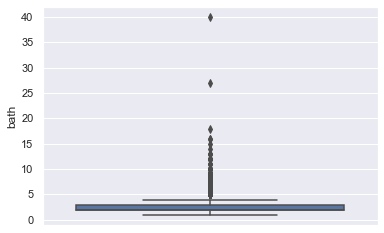

In [84]:
sns.boxplot(y='bath', data=data)


In [85]:
data["bath"].median()

2.0

In [86]:
missing_value = data.isnull().sum()
missing_percent = data.isnull().sum()/data.shape[0]*100
missing_percent = missing_percent.sort_values(ascending=False)
missing = pd.DataFrame({"Missing_count": missing_value.sort_values(ascending=False), "Missing_percent":missing_percent})
missing

Missing_count  Missing_percent
society                  5499        41.333434
balcony                   593         4.457306
bath                       57         0.428443
area_type                   0         0.000000
availability                0         0.000000
location                    0         0.000000
size                        0         0.000000
total_sqft                  0         0.000000
price                       0         0.000000
bhk                         0         0.000000
price_per_sqft              0         0.000000
sqft_per_bhk                0         0.000000

In [76]:
bhk_groupby_bathroom = data.groupby("bhk")["bath"].value_counts()
bhk_groupby_bathroom.head()

bhk  bath
1    1.0      609
     2.0       40
2    2.0     5286
     1.0      176
     3.0       61
Name: count, dtype: int64

In [77]:
def fcnFillBathrooms(bhk_groupby_bathroom, row):
    if pd.isnull(row["bath"]):
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        return int(row["bath"])


In [78]:
# Filling bhk null values on frequency basis
bhk_groupby_bathroom = data.groupby("bhk")["bath"].value_counts()
data["bath"] = data.apply(lambda row: fcnFillBathrooms(bhk_groupby_bathroom, row), axis=1)

In [79]:
missing_value = data.isnull().sum()
missing_percent = data.isnull().sum()/data.shape[0]*100
missing_percent = missing_percent.sort_values(ascending=False)
missing = pd.DataFrame({"Missing_count": missing_value.sort_values(ascending=False), "Missing_percent":missing_percent})
missing

Missing_count  Missing_percent
society                  5499        41.333434
balcony                   593         4.457306
area_type                   0         0.000000
availability                0         0.000000
location                    0         0.000000
size                        0         0.000000
total_sqft                  0         0.000000
bath                        0         0.000000
price                       0         0.000000
bhk                         0         0.000000
price_per_sqft              0         0.000000

In [91]:
data["bath"].value_counts()

2     6909
3     3310
4     1248
1      795
5      527
6      273
7      102
8       64
9       43
10      13
12       7
13       3
11       3
16       2
27       1
40       1
15       1
14       1
18       1
Name: bath, dtype: int64

<AxesSubplot:ylabel='bath'>

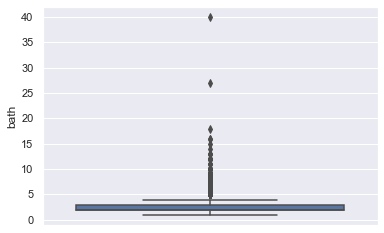

In [92]:
sns.boxplot(y='bath', data=data)


### i) Data Wrangling balcony

In [93]:
data["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [94]:
data["balcony"].unique()

array([ 1.,  3., nan,  2.,  0.])

In [95]:
# Checking number of unique values
print(f"Number of unique values in balcony : {data.balcony.nunique()}")

Number of unique values in balcony : 4


In [80]:
# Checking missing values in feature balcony
print(f"Total number of nan values in feature balcony : {data.balcony.isnull().sum()}")
data[data["balcony"].isnull()].head()

Total number of nan values in feature balcony : 593


area_type        availability          location       size  \
6   Super built-up  Area  Soon to be Vacated  Old Airport Road      4 BHK   
7   Super built-up  Area       Ready To Move      Rajaji Nagar      4 BHK   
9             Plot  Area       Ready To Move             Other  6 Bedroom   
34        Built-up  Area       Ready To Move     Kasturi Nagar      3 BHK   
40        Built-up  Area       Ready To Move     Murugeshpalya      2 BHK   

    society  total_sqft  bath  balcony  price  bhk  price_per_sqft  
6   Jaades       2732.0     4      NaN  204.0    4     7467.057101  
7   Brway G      3300.0     4      NaN  600.0    4    18181.818182  
9       NaN      1020.0     6      NaN  370.0    6    36274.509804  
34  Kantsce      1925.0     3      NaN  125.0    3     6493.506494  
40  Gentson      1296.0     2      NaN   81.0    2     6250.000000

In [81]:
bhk_groupby_balcony = data.groupby("bhk")["balcony"].value_counts()
bhk_groupby_balcony.head()

bhk  balcony
1    1.0         425
     0.0         186
     2.0          35
     3.0           2
2    1.0        2735
Name: count, dtype: int64

In [82]:
# Function for filling balcony on highest frequency basis
def fcnFillBalcony(bhk_groupby_balcony, row):
    if pd.isnull(row["balcony"]):
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        return int(row["balcony"])

In [83]:
# Applying function on feature balcony
bhk_groupby_balcony = data.groupby("bhk")["balcony"].value_counts()
data["balcony"] = data.apply(lambda row: fcnFillBalcony(bhk_groupby_balcony, row), axis=1)


In [84]:
# checking missing values in feature balcony
data["balcony"].isnull().sum()

0

###  Outliers Analysis
*
* Added a feature "price_per_sqft" and "sqft_per_bhk" that can help detect outliers

In [101]:
data.head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
1            Plot  Area       Ready To Move          Chikka Tirupathi   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   

        size  society  total_sqft  bath  balcony   price  bhk  price_per_sqft  \
0      2 BHK  Coomee       1056.0     2        1   39.07    2     3699.810606   
1  4 Bedroom  Theanmp      2600.0     5        3  120.00    4     4615.384615   
2      3 BHK      NaN      1440.0     2        3   62.00    3     4305.555556   
3      3 BHK  Soiewre      1521.0     3        1   95.00    3     6245.890861   
4      2 BHK      NaN      1200.0     2        1   51.00    2     4250.000000   

   sqft_per_bhk  
0         528.0  
1         650.0  
2         480.0  
3         507.0  
4         600.0

In [102]:
data.describe().T

count         mean            std       min          25%  \
total_sqft      13304.0  1911.208998   17287.246819  1.000000  1100.000000   
bath            13304.0     2.694904       1.340722  1.000000     2.000000   
balcony         13304.0     1.701744       1.057702  0.000000     1.000000   
price           13304.0   115.685717     394.683770  8.000000    50.000000   
bhk             13304.0     2.803743       1.294974  1.000000     2.000000   
price_per_sqft  13304.0  7974.267605  106601.577240  2.257423  4263.720988   
sqft_per_bhk    13304.0   701.787258    6563.099060  0.250000   473.333333   

                       50%          75%         max  
total_sqft      1276.00000  1680.000000   1306800.0  
bath               2.00000     3.000000        40.0  
balcony            2.00000     2.000000        18.0  
price             72.00000   120.000000     42278.0  
bhk                3.00000     3.000000        43.0  
price_per_sqft  5433.10124  7313.430891  12000000.0  
sqft_per_bhk     552.50000   625.000000    653400.0

In [103]:
data.describe(include="O").T

count unique                   top   freq
area_type     13304      4  Super built-up  Area   8790
availability  13304      2         Ready To Move  10581
location      13304    242                 Other   2898
size          13304     31                 2 BHK   5199
society        7805   2676               GrrvaGr     80

##### Checking Outliers by boxplot

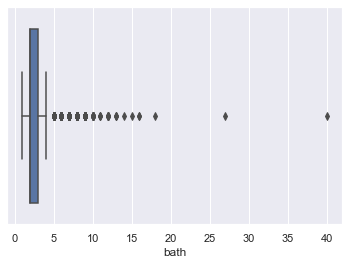

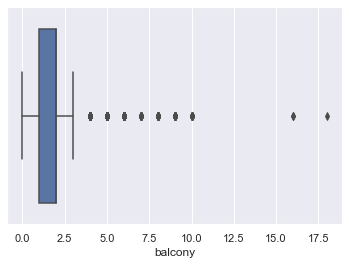

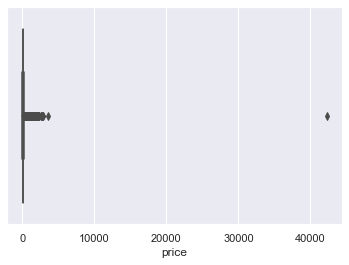

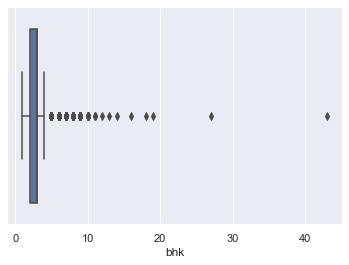

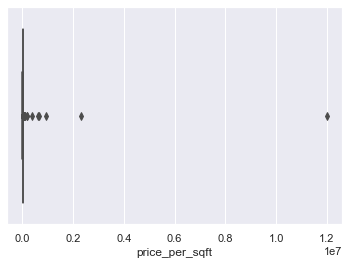

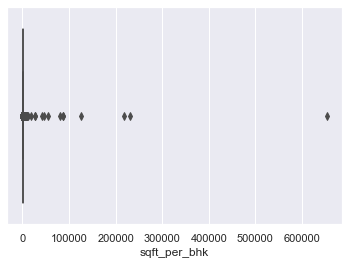

In [104]:
def boxplots(col):
    sns.boxplot(data[col])
    plt.show()
    
for i in list(data.select_dtypes(exclude=['object']).columns)[1:]:
    boxplots(i)

#####  Outliers detection and treatment in sqft_per_bhk


In [105]:

data["sqft_per_bhk"].describe().to_frame()

sqft_per_bhk
count   13304.000000
mean      701.787258
std      6563.099060
min         0.250000
25%       473.333333
50%       552.500000
75%       625.000000
max    653400.000000

<AxesSubplot:xlabel='sqft_per_bhk', ylabel='Density'>

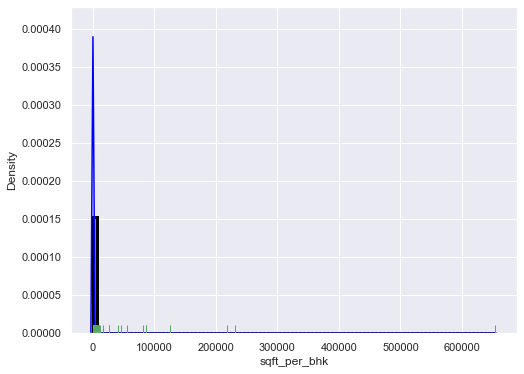

In [106]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.set_theme()
sns.distplot(data["sqft_per_bhk"],rug=True, rug_kws={"color": "g"}, hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black', "linewidth": 3,"alpha": 1, "color": "g"})

In [107]:
# Checking lower and upper range for sqft_per_bhk 
Q1, Q3 = data["sqft_per_bhk"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
std = data["sqft_per_bhk"].std()

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"lower_range = {lower_range}")
print(f"upper_range = {upper_range}")
print(f"std = {std}")

Q1 = 473.3333333333333
Q3 = 625.0
IQR = 151.66666666666669
lower_range = 245.8333333333333
upper_range = 852.5
std = 6563.099060112364


* From the description we ca see that minimum square feet per bhk is 0.250000 and maximum is 653400.
* Both seems to be outliers.
* Although from dataset we can see that lower_range for sqrt_per_bhk is 245.8333 and upper_range is 852.5.
* But for real world real estate bussiness purpose lower_range would be between 300 to 600 square feet per bhk. So let's we take 300.
* And upper_range be 1200
* So, we should remove samples that show sqft_per_room to be less than 300 and more than 1200 as it looks like an outlier when kde is analyzed


In [85]:
# Checking sqrt_per_bhk < 300
print(f"Total no. of samples having sqrt_per_bhk < 300 is :{len(data[data['total_sqft'] / data['bhk'] < 300].sort_values(by='total_sqft'))} " )
data[data['total_sqft'] / data['bhk'] < 300].sort_values(by='total_sqft').head()

Total no. of samples having sqrt_per_bhk < 300 is :748 


area_type        availability        location       size  society  \
4086      Plot  Area       Ready To Move  Sarjapur  Road  4 Bedroom      NaN   
4972  Built-up  Area       Ready To Move           Other      7 BHK      NaN   
349       Plot  Area  Soon to be Vacated           Other  3 Bedroom  PrhyaK    
1020    Carpet  Area       Ready To Move           Other      1 BHK      NaN   
1122  Built-up  Area       Ready To Move           Other  5 Bedroom      NaN   

      total_sqft  bath  balcony  price  bhk  price_per_sqft  
4086         1.0     4        4  120.0    4    1.200000e+07  
4972         5.0     7        3  115.0    7    2.300000e+06  
349         11.0     3        2   74.0    3    6.727273e+05  
1020        15.0     1        0   30.0    1    2.000000e+05  
1122        24.0     2        2  150.0    5    6.250000e+05

In [86]:
# Checking sqrt_per_bhk < 300
print(f"Total no. of samples having sqrt_per_bhk > 852.5 is :{len(data[data['total_sqft'] / data['bhk'] > 852.5].sort_values(by='total_sqft'))} " )
data[data['total_sqft'] / data['bhk'] > 852.5].sort_values(by='total_sqft').head()

Total no. of samples having sqrt_per_bhk > 852.5 is :795 


area_type        availability     location       size  \
9853   Super built-up  Area  Soon to be Vacated        Hoodi      1 BHK   
13258  Super built-up  Area  Soon to be Vacated   Whitefield      1 BHK   
1822   Super built-up  Area       Ready To Move   Nagarbhavi      1 BHK   
2940         Built-up  Area       Ready To Move        Other      1 BHK   
13215            Plot  Area       Ready To Move  Frazer Town  1 Bedroom   

       society  total_sqft  bath  balcony   price  bhk  price_per_sqft  
9853   Ranuetz       863.0     1        0   40.55    1     4698.725377  
13258  Oreldhi       877.0     1        1   59.00    1     6727.480046  
1822   MaentNa       884.0     2        2   36.00    1     4072.398190  
2940       NaN       890.0     1        1   75.00    1     8426.966292  
13215      NaN       896.0     1        0  100.00    1    11160.714286

In [87]:
# Checking sqrt_per_bhk < 1200
print(f"Total no. of samples having sqrt_per_bhk > 1200 is :{len(data[data['total_sqft'] / data['bhk'] > 1200].sort_values(by='total_sqft'))} " )
data[data['total_sqft'] / data['bhk'] > 1200].sort_values(by='total_sqft').head()

Total no. of samples having sqrt_per_bhk > 1200 is :207 


area_type   availability                location       size  \
3513             Plot  Area  Ready To Move                   Other  1 Bedroom   
2844             Plot  Area  Ready To Move                   Other  1 Bedroom   
918    Super built-up  Area  Ready To Move                   Other      1 BHK   
12010            Plot  Area  Ready To Move  Banashankari Stage III  1 Bedroom   
10660            Plot  Area  Ready To Move               TC Palaya  1 Bedroom   

      society  total_sqft  bath  balcony  price  bhk  price_per_sqft  
3513      NaN      1260.0     1        1   41.0    1     3253.968254  
2844      NaN      1260.0     1        0   41.0    1     3253.968254  
918       NaN      1300.0     1        0  200.0    1    15384.615385  
12010     NaN      1350.0     1        1  145.0    1    10740.740741  
10660     NaN      1350.0     1        0   55.0    1     4074.074074

In [89]:
# Checking sqrt_per_bhk < 300 by count
data[data["sqft_per_bhk"] < 300].count().to_frame("Count")

In [112]:
# Checking sqrt_per_bhk > 1200 by count
data[data["sqft_per_bhk"] > 1200].count().to_frame("Count")

Count
area_type         207
availability      207
location          207
size              207
society            83
total_sqft        207
bath              207
balcony           207
price             207
bhk               207
price_per_sqft    207
sqft_per_bhk      207

In [113]:
# Dropping data samples having sqft_per_bhk < 300 and sqft_per_bhk > 1200
data = data[~(data["sqft_per_bhk"] < 300)]
data = data[~(data["sqft_per_bhk"] > 1200)]

In [114]:
# Checking sqrt_per_bhk < 300
print(f"Total no. of samples having sqrt_per_bhk < 300 is :{len(data[data['total_sqft'] / data['bhk'] < 300].sort_values(by='total_sqft'))} " )
data[data['total_sqft'] / data['bhk'] < 300].sort_values(by='total_sqft')

Total no. of samples having sqrt_per_bhk < 300 is :0 


Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price, bhk, price_per_sqft, sqft_per_bhk]
Index: []

In [115]:
# Checking sqrt_per_bhk < 1200
print(f"Total no. of samples having sqrt_per_bhk > 1200 is :{len(data[data['total_sqft'] / data['bhk'] > 1200].sort_values(by='total_sqft'))} " )
data[data['total_sqft'] / data['bhk'] > 1200].sort_values(by='total_sqft')

Total no. of samples having sqrt_per_bhk > 1200 is :0 


Empty DataFrame
Columns: [area_type, availability, location, size, society, total_sqft, bath, balcony, price, bhk, price_per_sqft, sqft_per_bhk]
Index: []

In [116]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
from scipy.stats import spearmanr


la = data.sqft_per_bhk.tolist()
sp = data.price.tolist()

stat_p, p = pearsonr(la, sp)
stat_s, p1 = spearmanr(la, sp)

print('stat_p=%.3f, p=%.3f' % (stat_p, p))
print('stat_s=%.3f, p1=%.3f' % (stat_s, p1))

if p > 0.05:
    print('Accept the Null Hypothesis. There is no significant correlation between the variables.')
else:
    print('Accept the Alternative Hypothesis. There is a significant correlation between the variables.')

stat_p=0.412, p=0.000
stat_s=0.358, p1=0.000
Accept the Alternative Hypothesis. There is a significant correlation between the variables.


<AxesSubplot:xlabel='sqft_per_bhk', ylabel='Density'>

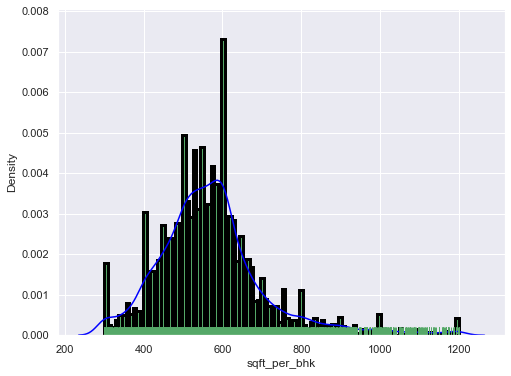

In [117]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.set_theme()
sns.distplot(data["sqft_per_bhk"],rug=True, rug_kws={"color": "g"}, hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black', "linewidth": 3,"alpha": 1, "color": "g"})

In [118]:
data.head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
1            Plot  Area       Ready To Move          Chikka Tirupathi   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   

        size  society  total_sqft  bath  balcony   price  bhk  price_per_sqft  \
0      2 BHK  Coomee       1056.0     2        1   39.07    2     3699.810606   
1  4 Bedroom  Theanmp      2600.0     5        3  120.00    4     4615.384615   
2      3 BHK      NaN      1440.0     2        3   62.00    3     4305.555556   
3      3 BHK  Soiewre      1521.0     3        1   95.00    3     6245.890861   
4      2 BHK      NaN      1200.0     2        1   51.00    2     4250.000000   

   sqft_per_bhk  
0         528.0  
1         650.0  
2         480.0  
3         507.0  
4         600.0

#####  Outliers detection and treatment in total_sqft


In [119]:
data["total_sqft"].describe().to_frame()

total_sqft
count  12349.000000
mean    1515.518287
std      731.811867
min      300.000000
25%     1113.000000
50%     1296.000000
75%     1685.000000
max    12000.000000

In [120]:
# Checking lower and upper range for sqft_per_bhk 
Q1, Q3 = data["total_sqft"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
std = data["total_sqft"].std()

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"lower_range = {lower_range}")
print(f"upper_range = {upper_range}")
print(f"std = {std}")

Q1 = 1113.0
Q3 = 1685.0
IQR = 572.0
lower_range = 255.0
upper_range = 2543.0
std = 731.8118671785771


In [121]:
print(f"One standard deviation from mean = {data.total_sqft.mean()+(data.total_sqft.std())}")
print(f"Two standard deviation from mean = {data.total_sqft.mean()+(2*data.total_sqft.std())}")
print(f"Three standard deviation from mean = {data.total_sqft.mean()+(3*data.total_sqft.std())}")

One standard deviation from mean = 2247.3301544612714
Two standard deviation from mean = 2979.1420216398483
Three standard deviation from mean = 3710.9538888184256


<AxesSubplot:xlabel='total_sqft'>

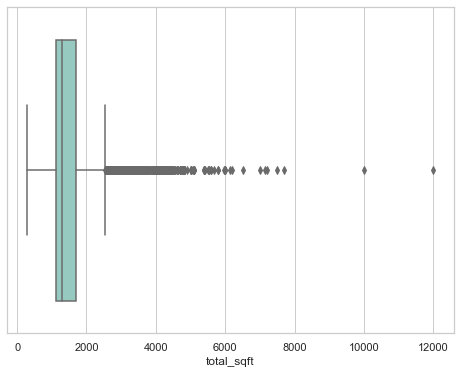

In [122]:
sns.set_theme(style="whitegrid")
sns.boxplot(data["total_sqft"],  palette="Set3")

<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

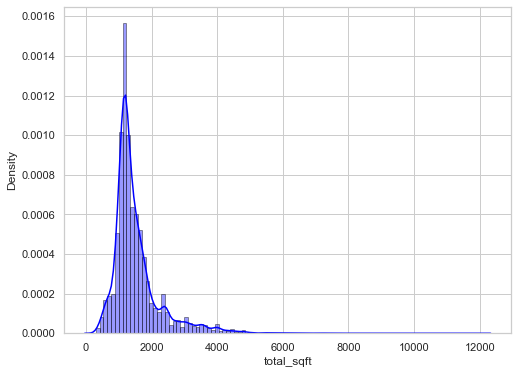

In [123]:
sns.distplot(data["total_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})


In [124]:
# Checking lower and upper range for sqft_per_bhk 
Q1, Q3 = data["total_sqft"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)
std = data["total_sqft"].std()

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"lower_range = {lower_range}")
print(f"upper_range = {upper_range}")
print(f"std = {std}")

print(f"Minimum Value = {data.total_sqft.min()}")
print(f"Maximum Value = {data.total_sqft.max()}")



print(f"One standard deviation from mean = {data.total_sqft.mean()+(data.total_sqft.std())}")
print(f"Two standard deviation from mean = {data.total_sqft.mean()+(2*data.total_sqft.std())}")
print(f"Three standard deviation from mean = {data.total_sqft.mean()+(3*data.total_sqft.std())}")



Q1 = 1113.0
Q3 = 1685.0
IQR = 572.0
lower_range = 255.0
upper_range = 2543.0
std = 731.8118671785771
Minimum Value = 300.0
Maximum Value = 12000.0
One standard deviation from mean = 2247.3301544612714
Two standard deviation from mean = 2979.1420216398483
Three standard deviation from mean = 3710.9538888184256


In [90]:
# Checking total_sqft > 3710.9538888184256
print(f"Total no. of samples having total_sqft > 3710.9538888184256 is :{len(data[data['total_sqft']  > 3710.9538888184256].sort_values(by='total_sqft'))} " )
data[data['total_sqft'] > 3710.9538888184256].sort_values(by='total_sqft').head()

Total no. of samples having total_sqft > 3710.9538888184256 is :460 


area_type        availability          location   size  \
10620  Super built-up  Area  Soon to be Vacated   Old Madras Road  4 BHK   
2265   Super built-up  Area       Ready To Move   Old Madras Road  4 BHK   
1683   Super built-up  Area       Ready To Move   Old Madras Road  4 BHK   
12210  Super built-up  Area       Ready To Move  Hebbal Kempapura  4 BHK   
6045         Built-up  Area       Ready To Move      Rajaji Nagar  4 BHK   

       society  total_sqft  bath  balcony  price  bhk  price_per_sqft  
10620  Brica E      3715.0     6        0  212.5    4     5720.053836  
2265   Brica E      3715.0     6        0  200.5    4     5397.039031  
1683   Brica E      3715.0     6        0  224.5    4     6043.068641  
12210  GonumPl      3729.0     4        2  384.0    4    10297.666935  
6045       NaN      3730.0     4        3  370.0    4     9919.571046

In [126]:
# Checking total_sqft > 6000
print(f"Total no. of samples having total_sqft > 6000 is :{len(data[data['total_sqft']  > 6000].sort_values(by='total_sqft'))} " )
data[data['total_sqft'] > 6000].sort_values(by='total_sqft')

Total no. of samples having total_sqft > 6000 is :10 


area_type   availability     location        size society  \
2024         Built-up  Area  Ready To Move    Banaswadi   7 Bedroom     NaN   
2826         Built-up  Area  Ready To Move     Kadugodi   9 Bedroom     NaN   
8743         Built-up  Area  Ready To Move        Other   7 Bedroom     NaN   
11577            Plot  Area  Ready To Move        Other   6 Bedroom     NaN   
13067            Plot  Area  Ready To Move        Other  10 Bedroom     NaN   
11142        Built-up  Area  Ready To Move  Munnekollal  10 Bedroom     NaN   
2885         Built-up  Area  Ready To Move       Tindlu   7 Bedroom     NaN   
1400   Super built-up  Area  Ready To Move   Chamrajpet       9 BHK     NaN   
3609   Super built-up  Area  Ready To Move        Other      16 BHK     NaN   
3096   Super built-up  Area  Ready To Move        Other      10 BHK     NaN   

       total_sqft  bath  balcony   price  bhk  price_per_sqft  sqft_per_bhk  
2024    6150.0000     6        1   830.0    7    13495.934959    878.571429  
2826    6200.0000     9        0   200.0    9     3225.806452    688.888889  
8743    6500.0000     7        1   104.0    7     1600.000000    928.571429  
11577   7000.0000     6        2   560.0    6     8000.000000   1166.666667  
13067   7150.0000    13       10  3600.0   10    50349.650350    715.000000  
11142   7200.0000    10        3   200.0   10     2777.777778    720.000000  
2885    7500.0000     7        2   400.0    7     5333.333333   1071.428571  
1400    7706.9524     9        1   296.0    9     3840.688052    856.328044  
3609   10000.0000    16       16   550.0   16     5500.000000    625.000000  
3096   12000.0000    12       10   525.0   10     4375.000000   1200.000000

In [127]:
len(data[(data["total_sqft"] > 6000)])

10

In [128]:
data = data[~(data["total_sqft"] > 6000)]

<AxesSubplot:xlabel='total_sqft'>

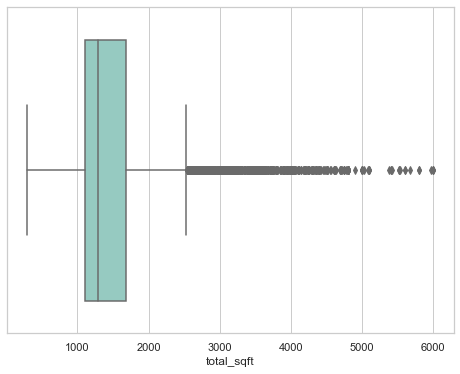

In [129]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.set_theme(style="whitegrid")
sns.boxplot(data["total_sqft"],  palette="Set3")

<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

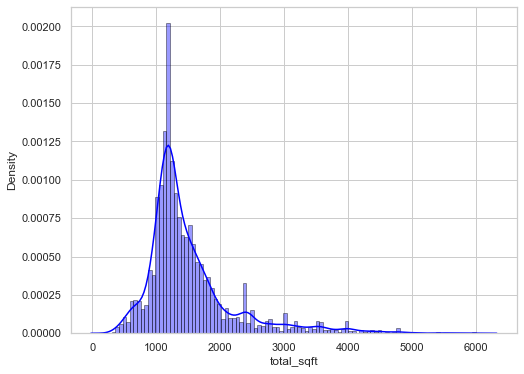

In [130]:
sns.distplot(data["total_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})


In [131]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr

la = data.total_sqft
sp = data.price

stat, p = pearsonr(la, sp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Accept the Null Hypothesis. There is no significant correlation between the variables.')
else:
    print('Accept the Alternative Hypothesis. There is a significant correlation between the variables.')

stat=0.710, p=0.000
Accept the Alternative Hypothesis. There is a significant correlation between the variables.


In [132]:
data.head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
1            Plot  Area       Ready To Move          Chikka Tirupathi   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   

        size  society  total_sqft  bath  balcony   price  bhk  price_per_sqft  \
0      2 BHK  Coomee       1056.0     2        1   39.07    2     3699.810606   
1  4 Bedroom  Theanmp      2600.0     5        3  120.00    4     4615.384615   
2      3 BHK      NaN      1440.0     2        3   62.00    3     4305.555556   
3      3 BHK  Soiewre      1521.0     3        1   95.00    3     6245.890861   
4      2 BHK      NaN      1200.0     2        1   51.00    2     4250.000000   

   sqft_per_bhk  
0         528.0  
1         650.0  
2         480.0  
3         507.0  
4         600.0

In [133]:
data.shape

(12339, 12)

In [134]:
data["bhk"].max()

13

In [135]:
data.isnull().sum()

area_type            0
availability         0
location             0
size                 0
society           4664
total_sqft           0
bath                 0
balcony              0
price                0
bhk                  0
price_per_sqft       0
sqft_per_bhk         0
dtype: int64

#####  Outliers detection and treatment in price_per_sqft	


In [136]:
data["price_per_sqft"].describe().to_frame()

price_per_sqft
count    12339.000000
mean      6231.541765
std       4018.971945
min        500.000000
25%       4205.607477
50%       5277.777778
75%       6861.352880
max     176470.588235

<AxesSubplot:xlabel='price_per_sqft'>

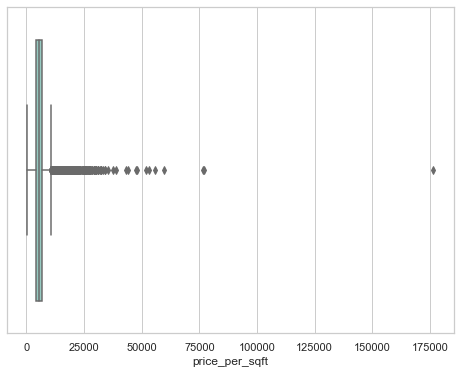

In [137]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.set_theme(style="whitegrid")
sns.boxplot(data["price_per_sqft"],  palette="Set3")

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

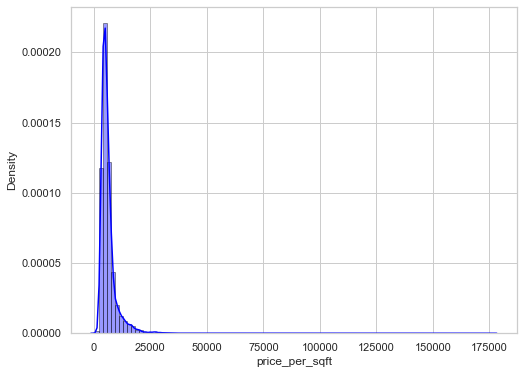

In [138]:
sns.distplot(data["price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})


In [139]:
# Checking lower and upper range for sqft_per_bhk 
Q1, Q3 = data["price_per_sqft"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"lower_range = {lower_range}")
print(f"upper_range = {upper_range}")

print(f"std = {std}")

print(f"Minimum Value = {data.price_per_sqft.min()}")
print(f"Maximum Value = {data.price_per_sqft.max()}")

print(f"Mean = {data.price_per_sqft.mean()}")
print(f"One standard deviation from mean = {data.price_per_sqft.mean()+(data.price_per_sqft.std())}")
print(f"Two standard deviation from mean = {data.price_per_sqft.mean()+(2*data.price_per_sqft.std())}")
print(f"Three standard deviation from mean = {data.price_per_sqft.mean()+(3*data.price_per_sqft.std())}")



Q1 = 4205.607476635514
Q3 = 6861.352879775105
IQR = 2655.745403139591
lower_range = 221.98937192612766
upper_range = 10844.970984484491
std = 731.8118671785771
Minimum Value = 500.0
Maximum Value = 176470.58823529413
Mean = 6231.541764904967
One standard deviation from mean = 10250.51370953815
Two standard deviation from mean = 14269.485654171334
Three standard deviation from mean = 18288.457598804518


In [140]:
data.price_per_sqft.mean()+(3*data.price_per_sqft.std())

18288.457598804518

In [141]:
6234.471781365789 + 18348.48816173763

24582.95994310342

In [142]:
len(data[~(data["price_per_sqft"] > 24582.95994310342)])

12262

In [143]:
len(data[~(data["price_per_sqft"] > 20000)])

12210

In [91]:
data.sort_values(["price"], ascending=False).head()

area_type        availability location        size  society  \
1311   Super built-up  Area       Ready To Move    Other       3 BHK  Niateki   
13067            Plot  Area       Ready To Move    Other  10 Bedroom      NaN   
11080  Super built-up  Area  Soon to be Vacated    Other       4 BHK      NaN   
13200            Plot  Area       Ready To Move    Other   6 Bedroom      NaN   
11763            Plot  Area       Ready To Move    Other   5 Bedroom      NaN   

       total_sqft  bath  balcony    price  bhk  price_per_sqft  
1311       4634.0     4        3  42278.0    3   912343.547691  
13067      7150.0    13       10   3600.0   10    50349.650350  
11080      8321.0     5        2   2912.0    4    34995.793775  
13200      8000.0     6        3   2800.0    6    35000.000000  
11763      9600.0     7        2   2736.0    5    28500.000000

In [92]:
data[~(data["price_per_sqft"] > 20000)].head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
1            Plot  Area       Ready To Move          Chikka Tirupathi   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   

        size  society  total_sqft  bath  balcony   price  bhk  price_per_sqft  
0      2 BHK  Coomee       1056.0     2        1   39.07    2     3699.810606  
1  4 Bedroom  Theanmp      2600.0     5        3  120.00    4     4615.384615  
2      3 BHK      NaN      1440.0     2        3   62.00    3     4305.555556  
3      3 BHK  Soiewre      1521.0     3        1   95.00    3     6245.890861  
4      2 BHK      NaN      1200.0     2        1   51.00    2     4250.000000

In [146]:
len(data[~(data["price_per_sqft"] > 20000)])

12210

In [147]:
data = data[~(data["price_per_sqft"] > data.price_per_sqft.mean()+(3*data.price_per_sqft.std()))]

In [148]:
len(data)

12143

In [149]:
# data = data[~(data["price_per_sqft"] > 20000)]

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

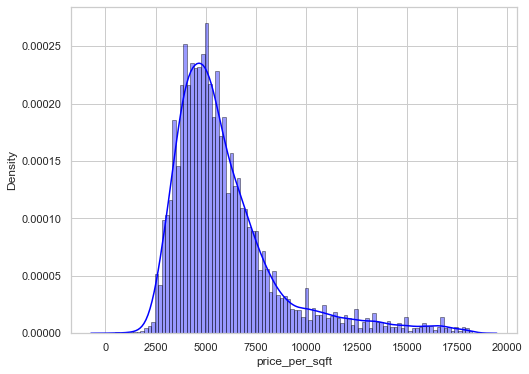

In [150]:
sns.distplot(data["price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})


In [151]:
data.shape

(12143, 12)

In [152]:
data.isnull().sum()

area_type            0
availability         0
location             0
size                 0
society           4491
total_sqft           0
bath                 0
balcony              0
price                0
bhk                  0
price_per_sqft       0
sqft_per_bhk         0
dtype: int64

#####  Outliers detection and treatment in price


In [153]:
data["price"].describe().to_frame()

price
count  12143.000000
mean      95.390378
std       82.121349
min        9.000000
25%       48.500000
50%       68.000000
75%      110.000000
max      988.000000

<AxesSubplot:xlabel='price'>

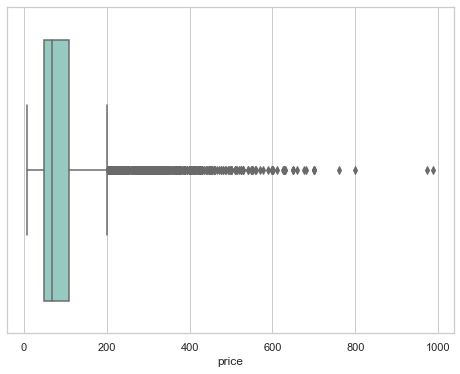

In [154]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.set_theme(style="whitegrid")
sns.boxplot(data["price"],  palette="Set3")

<AxesSubplot:xlabel='price', ylabel='Density'>

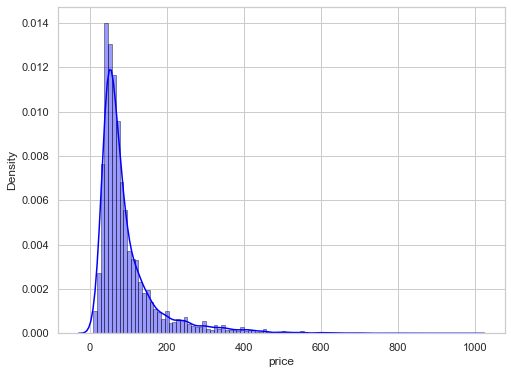

In [155]:
sns.distplot(data["price"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})


In [156]:
# Checking lower and upper range for sqft_per_bhk 
Q1, Q3 = data["price"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_range = Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

print(f"Q1 = {Q1}")
print(f"Q3 = {Q3}")
print(f"IQR = {IQR}")
print(f"lower_range = {lower_range}")
print(f"upper_range = {upper_range}")

Q1 = 48.5
Q3 = 110.0
IQR = 61.5
lower_range = -43.75
upper_range = 202.25


In [157]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    plt.rcParams['figure.figsize'] = (6,6)
    plt.scatter(bhk2['total_sqft'], 
                bhk2['price'], 
                color='blue', 
                label='2 BHK', 
                s=50
                )
    plt.scatter(bhk3['total_sqft'], 
                bhk3['price'], 
                marker='+',
                color='green', 
                label='3 BHK', 
                s=50
                )
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()


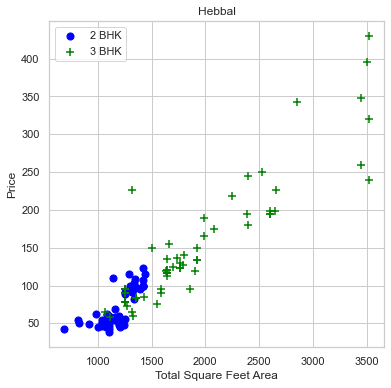

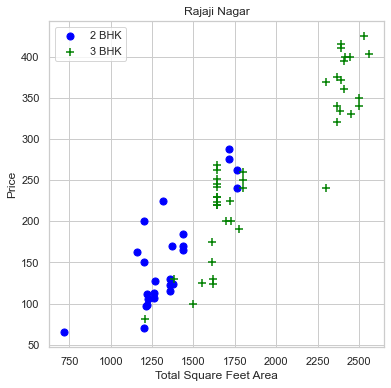

In [158]:
plot_scatter_chart(data,"Hebbal")
plot_scatter_chart(data,"Rajaji Nagar")

* plotting graoh where we can visualize that properties with same location and the price of 3 bhk properties with higher 'total_sqft' is less than 2 bhk properties with lower 'total_sqft'

In [159]:
# Q1 = 4205.1756007393715
# Q3 = 6861.6422947131605
# IQR = 2656.466693973789
# lower_range = 220.47555977868797
# upper_range = 10846.342335673844
# std = 731.8118671785771
# Minimum Value = 500.0
# Maximum Value = 176470.58823529413
# Mean = 6234.471781365789
# One standard deviation from mean = 10272.477241489736
# Two standard deviation from mean = 14310.482701613684
# Three standard deviation from mean = 18348.48816173763

In [160]:
# Outlier Removal Using Standard Deviation and Mean

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [161]:
data.describe().T

count         mean          std    min          25%  \
total_sqft      12143.0  1500.347591   697.425720  300.0  1110.000000   
bath            12143.0     2.518488     1.012181    1.0     2.000000   
balcony         12143.0     1.658569     0.908444    0.0     1.000000   
price           12143.0    95.390378    82.121349    9.0    48.500000   
bhk             12143.0     2.613275     0.922099    1.0     2.000000   
price_per_sqft  12143.0  5917.814752  2663.196941  500.0  4199.019608   
sqft_per_bhk    12143.0   574.349954   140.042369  300.0   492.000000   

                        50%          75%      max  
total_sqft      1290.000000  1665.500000   6000.0  
bath               2.000000     3.000000     14.0  
balcony            2.000000     2.000000     10.0  
price             68.000000   110.000000    988.0  
bhk                3.000000     3.000000     13.0  
price_per_sqft  5239.852399  6751.365442  18250.0  
sqft_per_bhk     560.250000   626.000000   1200.0

In [162]:
data = remove_bhk_outliers(data)
data.shape

(8617, 12)

In [163]:

# count	mean	std	min	25%	50%	75%	max
# total_sqft	8645.0	1502.669770	730.064084	300.0	1100.000000	1265.000000	1702.000000	6000.0
# bath	8645.0	2.520416	1.068871	1.0	2.000000	2.000000	3.000000	14.0
# balcony	8645.0	1.617467	0.907063	0.0	1.000000	2.000000	2.000000	10.0
# price	8645.0	108.461279	96.818043	9.0	50.000000	77.000000	125.000000	988.0
# bhk	8645.0	2.559167	0.972849	1.0	2.000000	2.000000	3.000000	13.0
# price_per_sqft	8645.0	6619.286541	3069.598099	500.0	4615.384615	5912.938331	7482.993197	20000.0
# sqft_per_bhk	8645.0	587.544081	145.912649	300.0	501.000000	575.000000	642.500000	1200.0

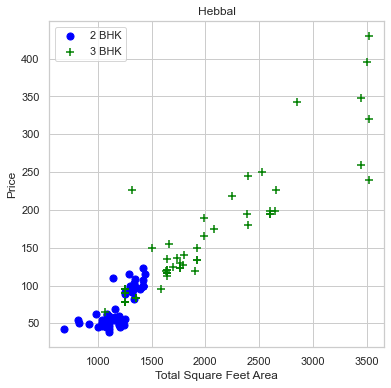

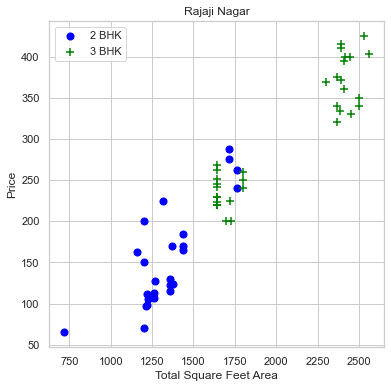

In [164]:
plot_scatter_chart(data,"Hebbal")
plot_scatter_chart(data,"Rajaji Nagar")

In [93]:
data[data.bath < data.bhk+2].head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
1            Plot  Area       Ready To Move          Chikka Tirupathi   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   

        size  society  total_sqft  bath  balcony   price  bhk  price_per_sqft  
0      2 BHK  Coomee       1056.0     2        1   39.07    2     3699.810606  
1  4 Bedroom  Theanmp      2600.0     5        3  120.00    4     4615.384615  
2      3 BHK      NaN      1440.0     2        3   62.00    3     4305.555556  
3      3 BHK  Soiewre      1521.0     3        1   95.00    3     6245.890861  
4      2 BHK      NaN      1200.0     2        1   51.00    2     4250.000000

In [166]:
data[data.bath > data.bhk+2]

area_type   availability       location       size  society  \
1078             Plot  Area  Ready To Move          Other  9 Bedroom  Srvasks   
7709         Built-up  Area  Ready To Move  Chikkabanavar  4 Bedroom      NaN   
12103  Super built-up  Area  Ready To Move    Thanisandra      3 BHK  Soitya    

       total_sqft  bath  balcony  price  bhk  price_per_sqft  sqft_per_bhk  
1078       3300.0    14        9  500.0    9    15151.515152    366.666667  
7709       2460.0     7        2   80.0    4     3252.032520    615.000000  
12103      1806.0     6        2  116.0    3     6423.034330    602.000000

In [167]:
len(data[data.bath > data.bhk+2])

3

Text(0, 0.5, 'Count')

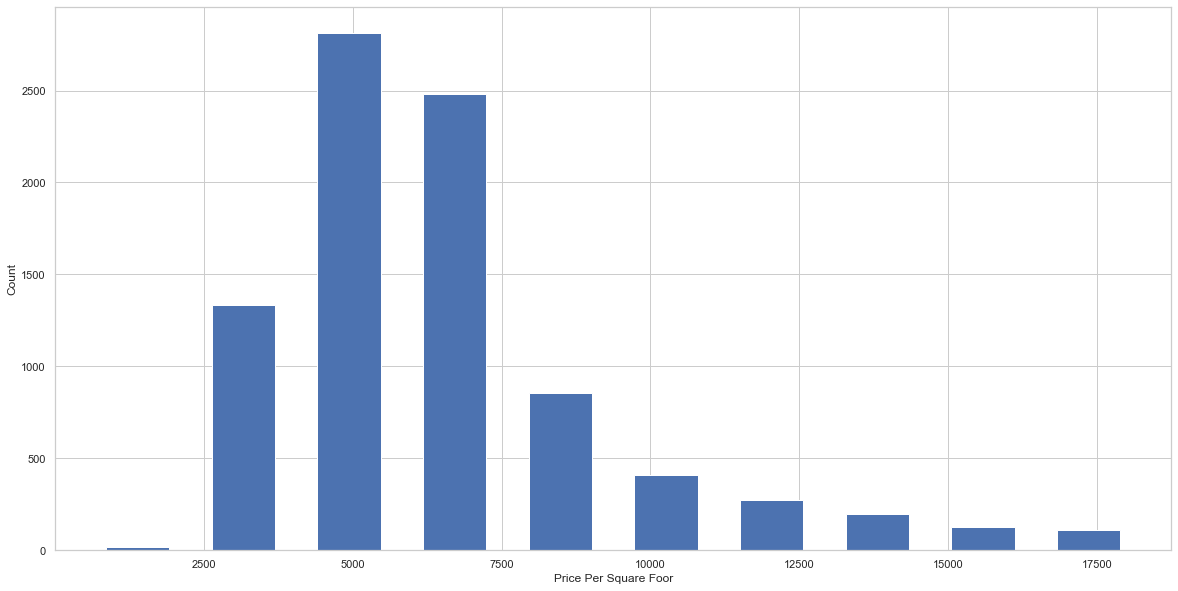

In [168]:
plt.rcParams['figure.figsize']=(20,10)
plt.hist(data.price_per_sqft,rwidth=0.6)
plt.xlabel("Price Per Square Foor")
plt.ylabel("Count")

##### Outlier Removal Using Bathrooms Feature

In [169]:
data.bath.unique()

array([ 2,  3,  4,  5,  1,  8,  6,  7,  9, 14, 10, 12, 13], dtype=int64)

In [170]:
data[data.bath>10]

area_type   availability        location       size  society  \
1078            Plot  Area  Ready To Move           Other  9 Bedroom  Srvasks   
7979  Super built-up  Area  Ready To Move           Other     11 BHK      NaN   
8636  Super built-up  Area  Ready To Move  Neeladri Nagar     10 BHK      NaN   
9935  Super built-up  Area  Ready To Move           Other     13 BHK      NaN   

      total_sqft  bath  balcony  price  bhk  price_per_sqft  sqft_per_bhk  
1078      3300.0    14        9  500.0    9    15151.515152    366.666667  
7979      6000.0    12        6  150.0   11     2500.000000    545.454545  
8636      4000.0    12       10  160.0   10     4000.000000    400.000000  
9935      5425.0    13        0  275.0   13     5069.124424    417.307692

Text(0, 0.5, 'Count')

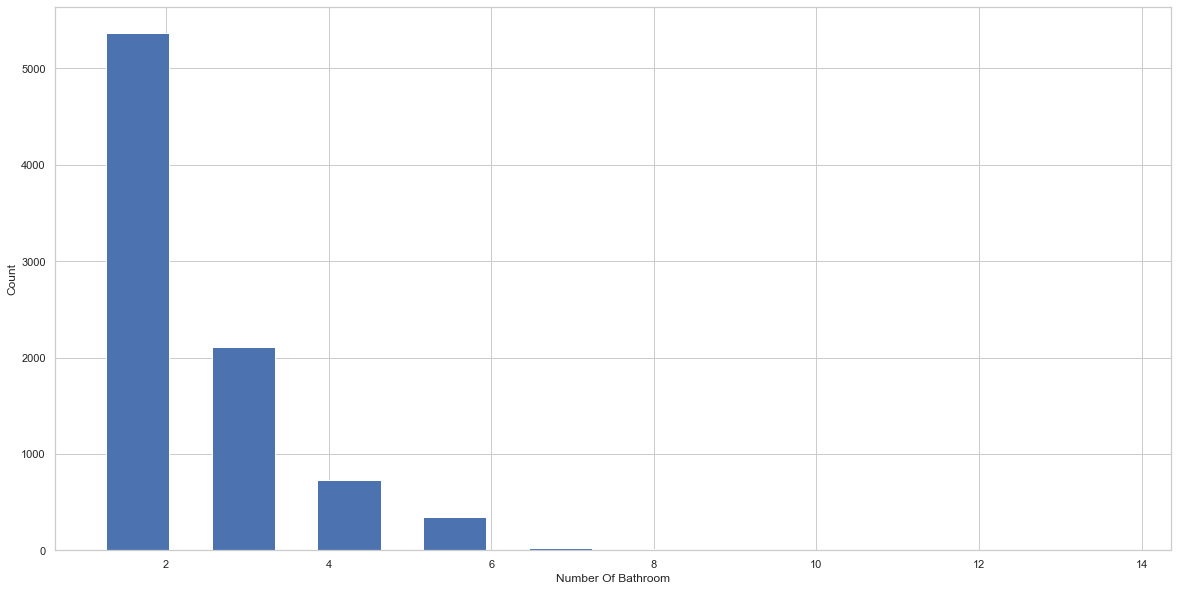

In [171]:
plt.rcParams['figure.figsize']=(20,10)
plt.hist(data.bath,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

In [172]:
data[data.bath>data.bhk+2]

area_type   availability       location       size  society  \
1078             Plot  Area  Ready To Move          Other  9 Bedroom  Srvasks   
7709         Built-up  Area  Ready To Move  Chikkabanavar  4 Bedroom      NaN   
12103  Super built-up  Area  Ready To Move    Thanisandra      3 BHK  Soitya    

       total_sqft  bath  balcony  price  bhk  price_per_sqft  sqft_per_bhk  
1078       3300.0    14        9  500.0    9    15151.515152    366.666667  
7709       2460.0     7        2   80.0    4     3252.032520    615.000000  
12103      1806.0     6        2  116.0    3     6423.034330    602.000000

In [173]:
data = data[data.bath < data.bhk+2]
data.shape


(8517, 12)

### Hypothesis Testing

<AxesSubplot:xlabel='price', ylabel='Density'>

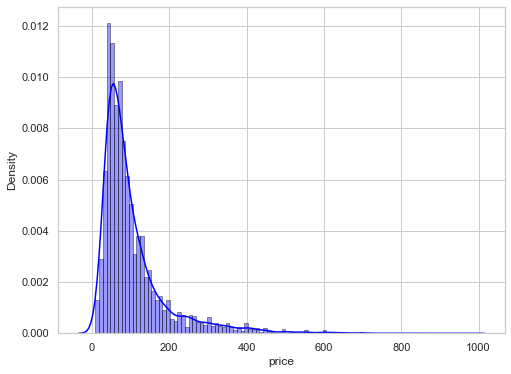

In [174]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.distplot(data["price"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

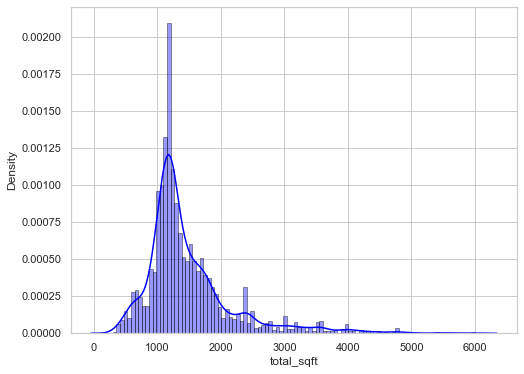

In [175]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.distplot(data["total_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})


Super built-up  Area    5986
Built-up  Area          1529
Plot  Area               941
Carpet  Area              61
Name: area_type, dtype: int64
AxesSubplot(0.562078,0.125;0.323571x0.755)


Text(0.5, 1.0, 'area_type ratio Proposanate')

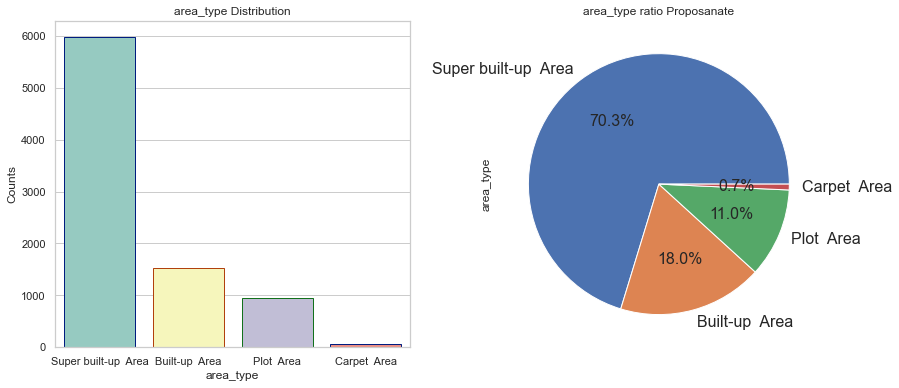

In [176]:
#  Distribution of "BusinessTravel"
fig, ax = plt.subplots(1,2,figsize=(14,6))
ax1=plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.countplot(x="area_type",  data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
# sns.set_theme(style="darkgrid")
plt.xlabel('area_type')
plt.ylabel('Counts')
plt.title('area_type Distribution')
ax2=plt.subplot(1,2,2)
val_counts = data['area_type'].value_counts()
print(val_counts)
print(val_counts.plot(kind='pie', autopct='%1.1f%%', fontsize = 16))
plt.title('area_type ratio Proposanate')

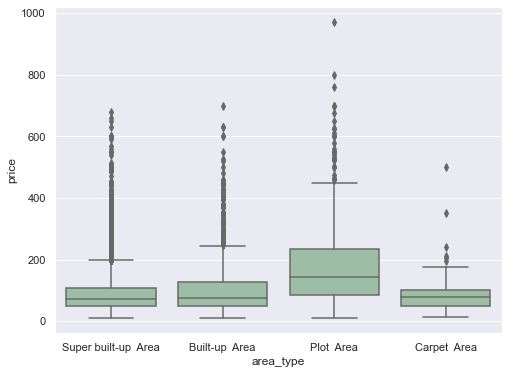

In [177]:
ax = sns.boxplot(x='area_type', y='price', data=data, color='#99c2a2')

In [178]:
data["area_type"].value_counts()

Super built-up  Area    5986
Built-up  Area          1529
Plot  Area               941
Carpet  Area              61
Name: area_type, dtype: int64

In [179]:
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('price ~ C(area_type)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df           F         PR(>F)
C(area_type)  6.033792e+06     3.0  282.697706  6.184330e-175
Residual      6.056608e+07  8513.0         NaN            NaN

In [180]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=data, res_var='price', anova_model='price ~ C(area_type)')
res.anova_summary

df        sum_sq       mean_sq           F         PR(>F)
C(area_type)     3.0  6.033792e+06  2.011264e+06  282.697706  6.184330e-175
Residual      8513.0  6.056608e+07  7.114540e+03         NaN            NaN

Text(0, 0.5, 'Count')

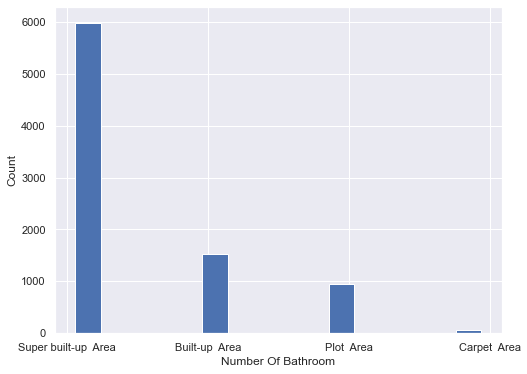

In [181]:
plt.rcParams['figure.figsize']=(8,6)
plt.hist(data.area_type,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

Text(0.5, 1.0, 'balcony Distribution')

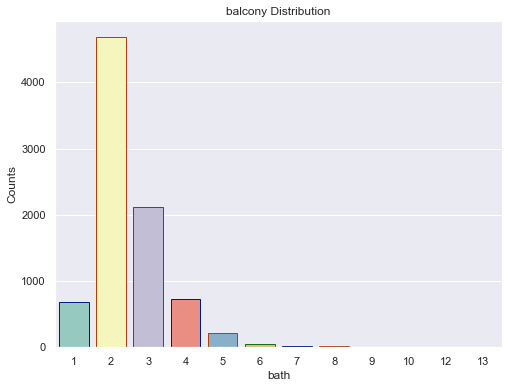

In [182]:
#  Distribution of "balcony"

sns.set_theme(style="darkgrid")
sns.countplot(x="bath",  data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('bath')
plt.ylabel('Counts')
plt.title('balcony Distribution')


Text(0, 0.5, 'Count')

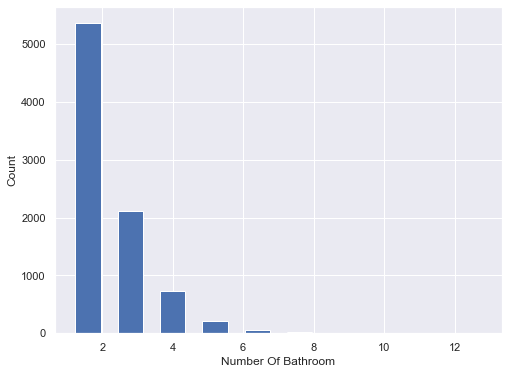

In [183]:
plt.rcParams['figure.figsize']=(8,6)
plt.hist(data.bath,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

Text(0.5, 1.0, 'balcony Distribution')

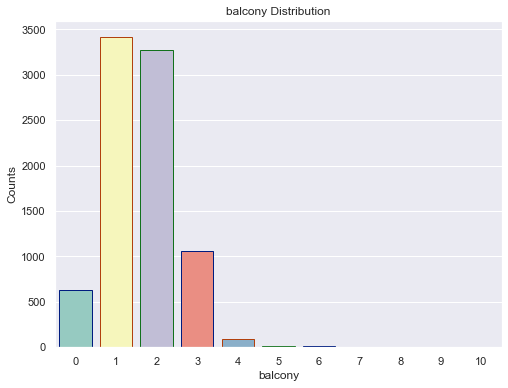

In [184]:
#  Distribution of "balcony"

sns.set_theme(style="darkgrid")
sns.countplot(x="balcony",  data=data, palette="Set3", edgecolor=sns.color_palette("dark", 3))
plt.xlabel('balcony')
plt.ylabel('Counts')
plt.title('balcony Distribution')


Text(0, 0.5, 'Count')

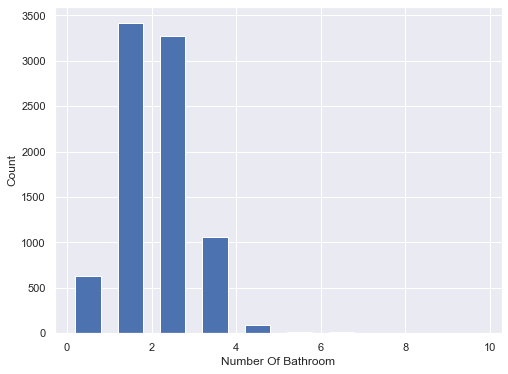

In [185]:
plt.rcParams['figure.figsize']=(8,6)
plt.hist(data.balcony,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

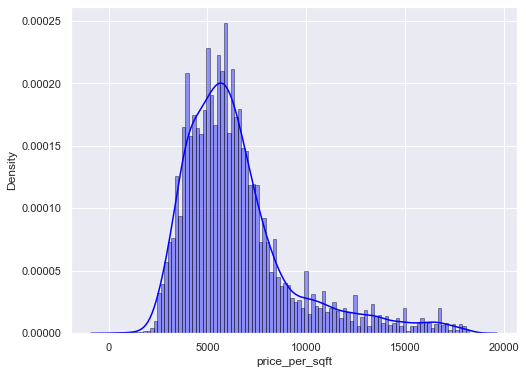

In [186]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.distplot(data["price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})


<AxesSubplot:xlabel='sqft_per_bhk', ylabel='Density'>

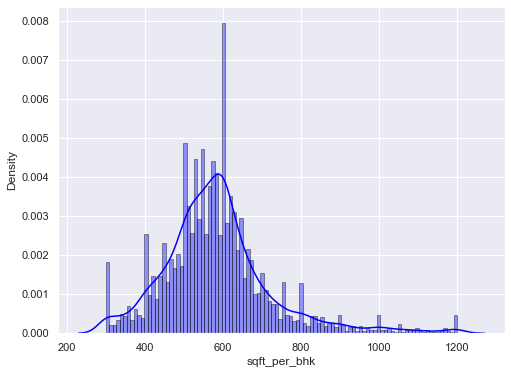

In [187]:
plt.rcParams['figure.figsize'] = (8, 6)

sns.distplot(data["sqft_per_bhk"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})


##### Checking correlation of price with others



In [188]:
data.corr()["price"].sort_values(ascending=False).to_frame()

price
price           1.000000
total_sqft      0.833067
price_per_sqft  0.777700
bath            0.653133
bhk             0.633406
sqft_per_bhk    0.491408
balcony         0.303017

##### Checking Multi-colinearity among independent variables


<AxesSubplot:>

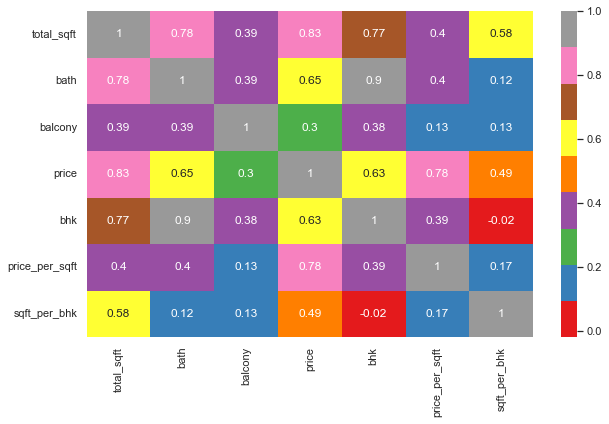

In [189]:
# Selecting our features wisely to avoid overfitting
# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap=sns.color_palette("Set1"))

In [190]:
# Defining a function for variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     

In [191]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(data[[i for i in data.describe().columns if i not in ['price']]])

variables        VIF
0      total_sqft  20.333425
1            bath  43.321337
2         balcony   5.139575
3             bhk  43.312420
4  price_per_sqft   7.619405
5    sqft_per_bhk  10.900186

In [192]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'bhk', 'price_per_sqft',
       'sqft_per_bhk'],
      dtype='object')

In [193]:
data1 = data.copy()

In [194]:
data1.head()

area_type        availability                  location   size  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II  2 BHK   
2        Built-up  Area       Ready To Move               Uttarahalli  3 BHK   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli  3 BHK   
4  Super built-up  Area       Ready To Move                  Kothanur  2 BHK   
6  Super built-up  Area  Soon to be Vacated          Old Airport Road  4 BHK   

   society  total_sqft  bath  balcony   price  bhk  price_per_sqft  \
0  Coomee       1056.0     2        1   39.07    2     3699.810606   
2      NaN      1440.0     2        3   62.00    3     4305.555556   
3  Soiewre      1521.0     3        1   95.00    3     6245.890861   
4      NaN      1200.0     2        1   51.00    2     4250.000000   
6  Jaades       2732.0     4        4  204.00    4     7467.057101   

   sqft_per_bhk  
0         528.0  
2         480.0  
3         507.0  
4         600.0  
6         683.0

In [195]:
data.drop(["society", "size", "sqft_per_bhk", "balcony"], axis=1, inplace=True)

In [196]:
data.columns

Index(['area_type', 'availability', 'location', 'total_sqft', 'bath', 'price',
       'bhk', 'price_per_sqft'],
      dtype='object')

<AxesSubplot:>

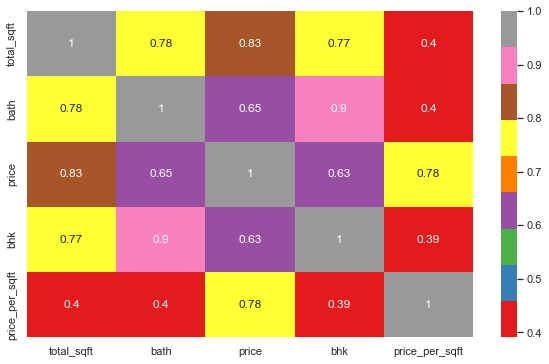

In [197]:
# Selecting our features wisely to avoid overfitting
# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap=sns.color_palette("Set1"))

In [198]:
clean_data = data.copy()

In [199]:
clean_data.head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   
6  Super built-up  Area  Soon to be Vacated          Old Airport Road   

   total_sqft  bath   price  bhk  price_per_sqft  
0      1056.0     2   39.07    2     3699.810606  
2      1440.0     2   62.00    3     4305.555556  
3      1521.0     3   95.00    3     6245.890861  
4      1200.0     2   51.00    2     4250.000000  
6      2732.0     4  204.00    4     7467.057101

In [200]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8517 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       8517 non-null   object 
 1   availability    8517 non-null   object 
 2   location        8517 non-null   object 
 3   total_sqft      8517 non-null   float64
 4   bath            8517 non-null   int64  
 5   price           8517 non-null   float64
 6   bhk             8517 non-null   int64  
 7   price_per_sqft  8517 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 598.9+ KB


In [201]:
clean_data.describe().T

count         mean          std    min          25%  \
total_sqft      8517.0  1480.105831   701.978610  300.0  1095.000000   
bath            8517.0     2.469179     0.985162    1.0     2.000000   
price           8517.0   104.019128    88.433919    9.0    50.000000   
bhk             8517.0     2.534108     0.948494    1.0     2.000000   
price_per_sqft  8517.0  6487.629962  2845.209595  500.0  4594.594595   

                        50%          75%      max  
total_sqft      1260.000000  1691.000000   6000.0  
bath               2.000000     3.000000     13.0  
price             75.000000   121.000000    972.0  
bhk                2.000000     3.000000     13.0  
price_per_sqft  5870.445344  7384.169884  18250.0

In [202]:
clean_data.describe(include ="O").T

count unique                   top  freq
area_type     8517      4  Super built-up  Area  5986
availability  8517      2         Ready To Move  6689
location      8517    242                 Other  1117

In [203]:
clean_data1 = clean_data.copy()

In [204]:
clean_data.head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   
6  Super built-up  Area  Soon to be Vacated          Old Airport Road   

   total_sqft  bath   price  bhk  price_per_sqft  
0      1056.0     2   39.07    2     3699.810606  
2      1440.0     2   62.00    3     4305.555556  
3      1521.0     3   95.00    3     6245.890861  
4      1200.0     2   51.00    2     4250.000000  
6      2732.0     4  204.00    4     7467.057101

In [205]:
data1.head()

area_type        availability                  location   size  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II  2 BHK   
2        Built-up  Area       Ready To Move               Uttarahalli  3 BHK   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli  3 BHK   
4  Super built-up  Area       Ready To Move                  Kothanur  2 BHK   
6  Super built-up  Area  Soon to be Vacated          Old Airport Road  4 BHK   

   society  total_sqft  bath  balcony   price  bhk  price_per_sqft  \
0  Coomee       1056.0     2        1   39.07    2     3699.810606   
2      NaN      1440.0     2        3   62.00    3     4305.555556   
3  Soiewre      1521.0     3        1   95.00    3     6245.890861   
4      NaN      1200.0     2        1   51.00    2     4250.000000   
6  Jaades       2732.0     4        4  204.00    4     7467.057101   

   sqft_per_bhk  
0         528.0  
2         480.0  
3         507.0  
4         600.0  
6         683.0

# EDA (Explaratory Data Analysis)

### price

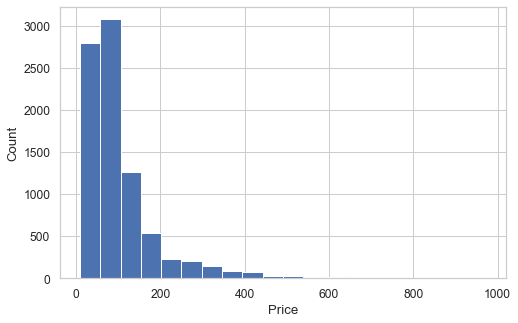

In [206]:

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    clean_data['price'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Price', ylabel='Count');

In [207]:
numerical = ["total_sqft", "bath", "price", "bhk", "price_per_sqft"]
categorical = ["area_type", "availability", "location"]

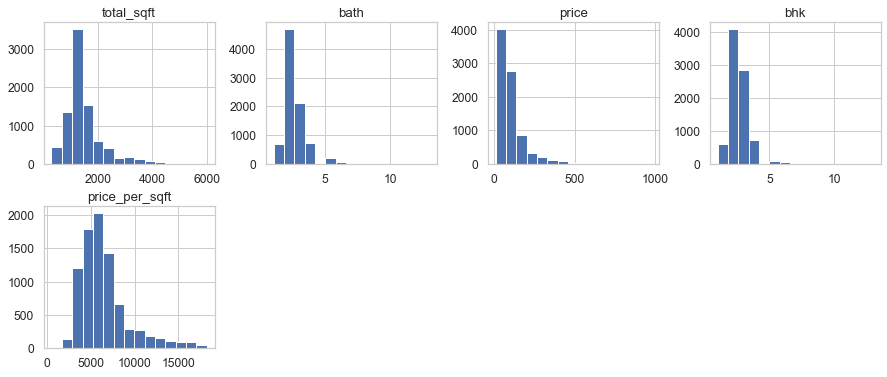

In [208]:
clean_data[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

### area_type

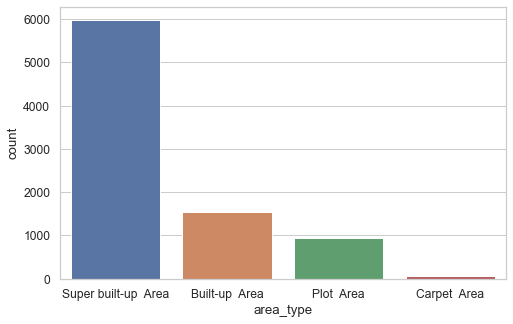

In [209]:

sns.countplot(clean_data['area_type']);

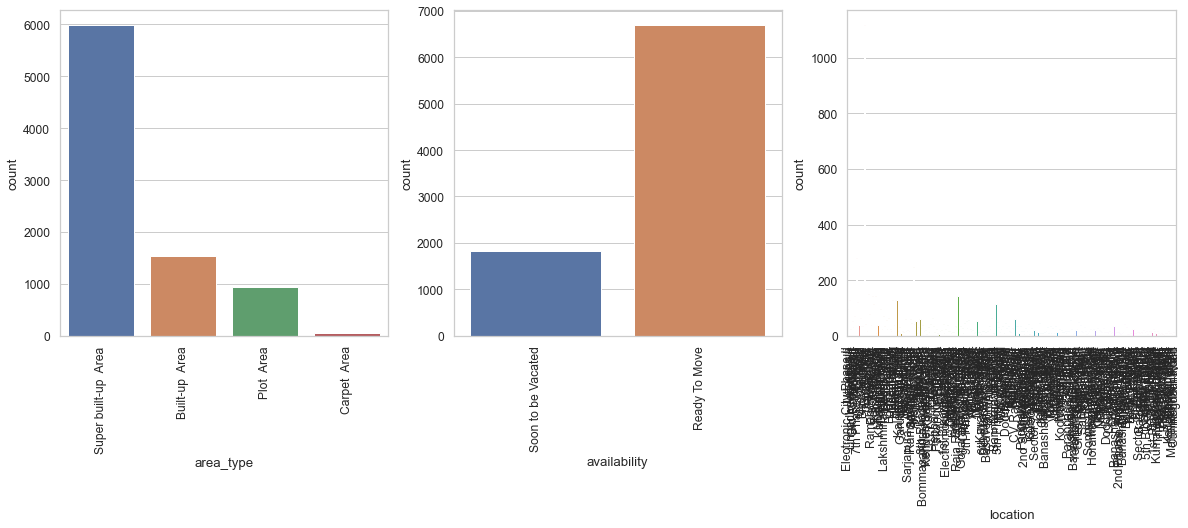

In [210]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(clean_data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Analyzing relationship between numerical variables

<AxesSubplot:xlabel='price', ylabel='total_sqft'>

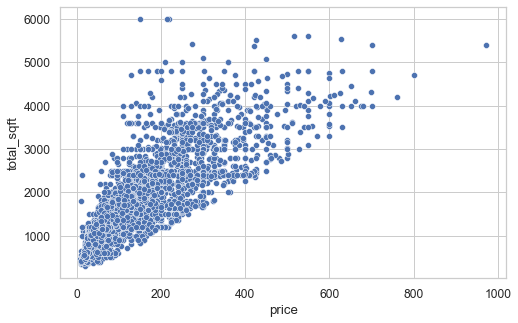

In [211]:
sns.scatterplot(x=clean_data['price'], y=clean_data['total_sqft'])

<AxesSubplot:xlabel='price', ylabel='price_per_sqft'>

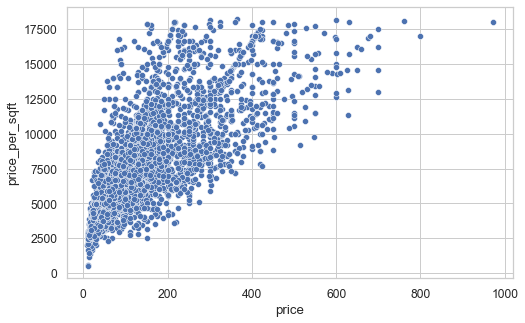

In [212]:
sns.scatterplot(x=clean_data['price'], y=clean_data['price_per_sqft'])

<AxesSubplot:xlabel='price', ylabel='bhk'>

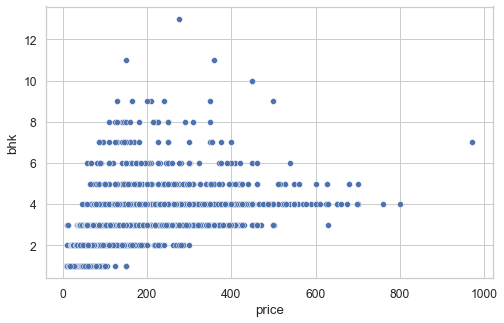

In [213]:
sns.scatterplot(x=clean_data['price'], y=clean_data['bhk'])

<AxesSubplot:xlabel='price', ylabel='bath'>

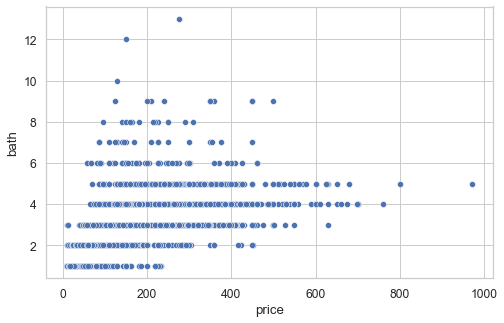

In [214]:
sns.scatterplot(x=clean_data['price'], y=clean_data['bath'])

<AxesSubplot:xlabel='total_sqft', ylabel='bath'>

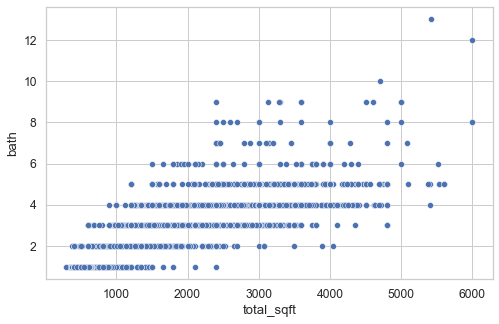

In [215]:
sns.scatterplot(x=clean_data['total_sqft'], y=clean_data['bath'])

<AxesSubplot:xlabel='total_sqft', ylabel='bhk'>

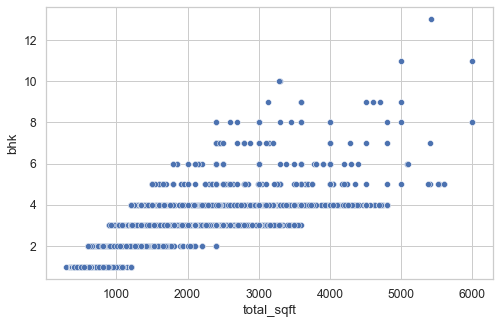

In [216]:
sns.scatterplot(x=clean_data['total_sqft'], y=clean_data['bhk'])

<AxesSubplot:xlabel='total_sqft', ylabel='price_per_sqft'>

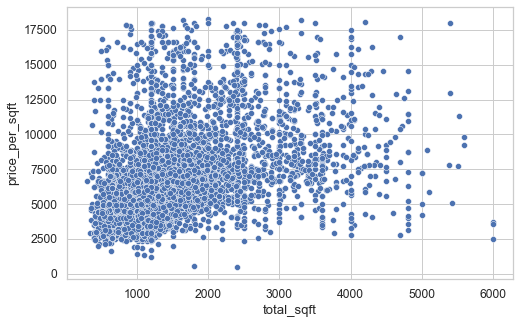

In [217]:
sns.scatterplot(x=clean_data['total_sqft'], y=clean_data['price_per_sqft'])

### Analyzing Relationships Between Numerical and Categorical Variables

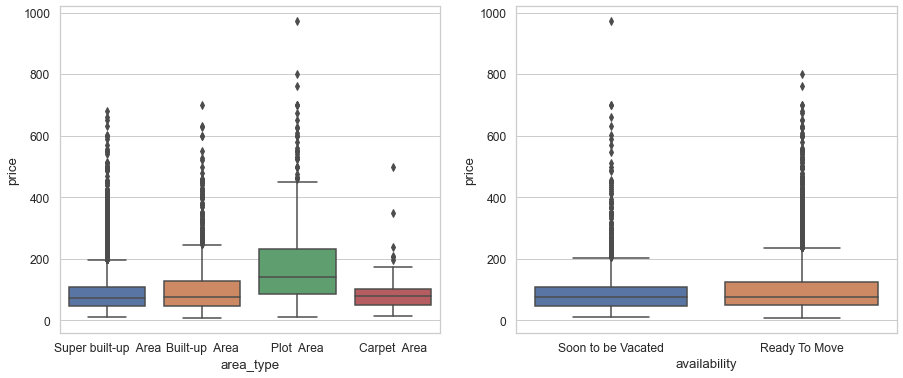

In [218]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
for var, subplot in zip(categorical[:2], ax.flatten()):
    sns.boxplot(x=var, y='price', data=clean_data,  ax=subplot)

In [95]:
sorted_nb = clean_data.groupby(['location'])['price'].median().sort_values()
# sns.boxplot(x=clean_data['location'], y=clean_data['price'], order=list(sorted_nb.index))
sorted_nb.head()

<AxesSubplot:xlabel='location', ylabel='price'>

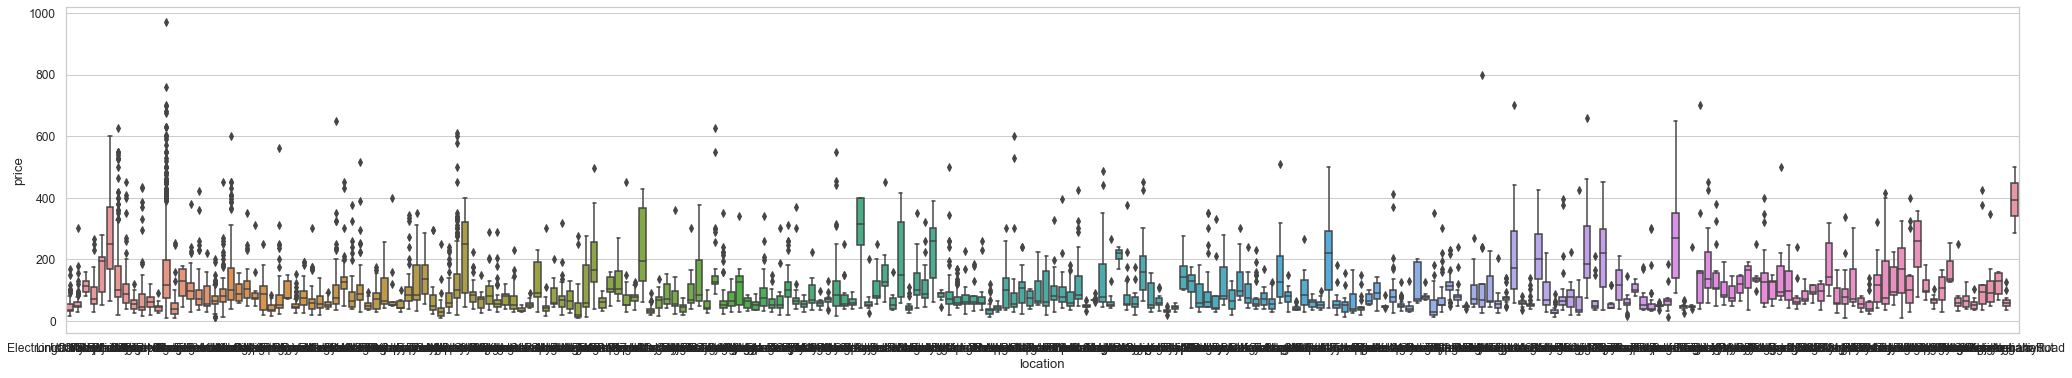

In [220]:
plt.figure(figsize=(35,6))
sns.boxplot(x="location", y="price", data=clean_data)

<AxesSubplot:xlabel='area_type', ylabel='price'>

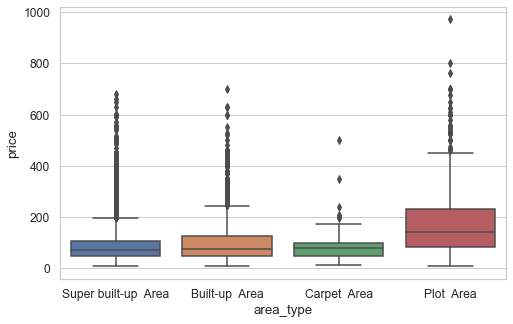

In [221]:
sorted_nb = clean_data.groupby(['area_type'])['price'].median().sort_values()
sns.boxplot(x=clean_data['area_type'], y=clean_data['price'], order=list(sorted_nb.index))

<AxesSubplot:xlabel='availability', ylabel='price'>

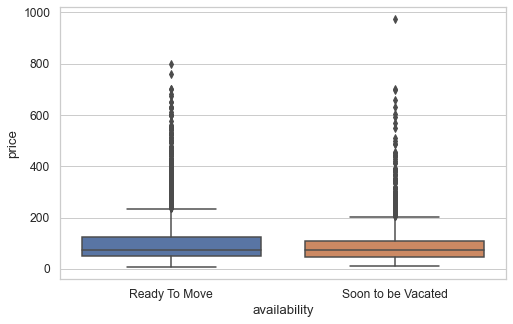

In [222]:
sorted_nb = clean_data.groupby(['availability'])['price'].median().sort_values()
sns.boxplot(x=clean_data['availability'], y=clean_data['price'], order=list(sorted_nb.index))

In [223]:
sorted_nb = clean_data.groupby(['location'])['price'].median().sort_values()
# sns.boxplot(x=clean_data['location'], y=clean_data['price'], order=list(sorted_nb.index))
sorted_nb 

location
Attibele                        18.275
Ananth Nagar                    26.425
Chandapura                      27.340
Yelahanka New Town              27.500
Kammasandra                     31.995
Kereguddadahalli                32.000
Bommasandra Industrial Area     33.075
Anekal                          36.000
Electronic City Phase II        36.000
Doddathoguru                    36.250
Neeladri Nagar                  36.500
Vishwapriya Layout              37.000
Kengeri                         38.000
Channasandra                    39.170
Vasanthapura                    39.730
Hoskote                         40.000
Anjanapura                      40.000
Abbigere                        40.390
Bommasandra                     40.445
Sompura                         41.000
Kengeri Satellite Town          42.000
Doddakallasandra                42.935
Mico Layout                     43.000
Horamavu Agara                  43.090
Dasanapura                      43.100
Dommasandra     

In [224]:
clean_data.head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   
6  Super built-up  Area  Soon to be Vacated          Old Airport Road   

   total_sqft  bath   price  bhk  price_per_sqft  
0      1056.0     2   39.07    2     3699.810606  
2      1440.0     2   62.00    3     4305.555556  
3      1521.0     3   95.00    3     6245.890861  
4      1200.0     2   51.00    2     4250.000000  
6      2732.0     4  204.00    4     7467.057101

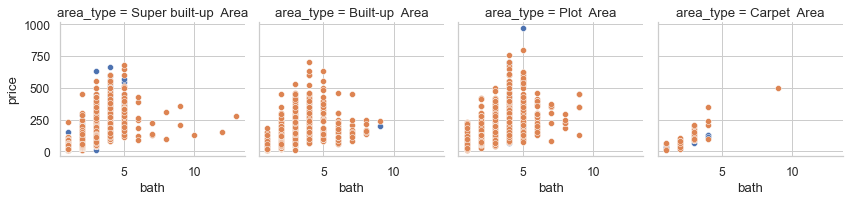

In [225]:

cond_plot = sns.FacetGrid(data=clean_data, col='area_type', hue='availability', col_wrap=4)
cond_plot.map(sns.scatterplot, 'bath', 'price');

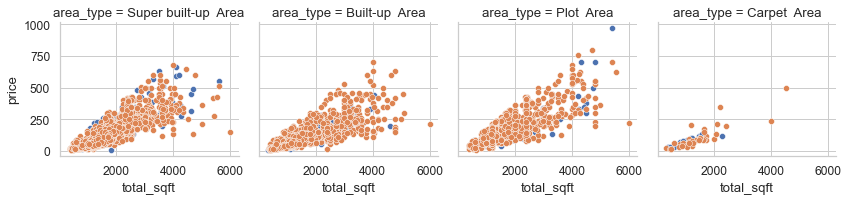

In [226]:

cond_plot = sns.FacetGrid(data=clean_data, col='area_type', hue='availability', col_wrap=4)
cond_plot.map(sns.scatterplot, 'total_sqft', 'price');

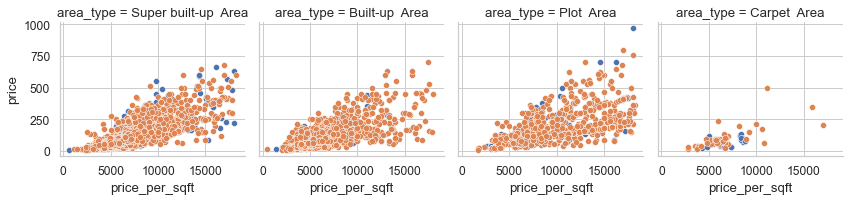

In [227]:

cond_plot = sns.FacetGrid(data=clean_data, col='area_type', hue='availability', col_wrap=4)
cond_plot.map(sns.scatterplot, 'price_per_sqft', 'price');

In [228]:
clean_data.head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   
6  Super built-up  Area  Soon to be Vacated          Old Airport Road   

   total_sqft  bath   price  bhk  price_per_sqft  
0      1056.0     2   39.07    2     3699.810606  
2      1440.0     2   62.00    3     4305.555556  
3      1521.0     3   95.00    3     6245.890861  
4      1200.0     2   51.00    2     4250.000000  
6      2732.0     4  204.00    4     7467.057101

### Checking Feature Importance

In [229]:
clean_data1 = pd.DataFrame({col: clean_data1[col].astype('category').cat.codes for col in clean_data1}, index=clean_data1.index)

clean_data1.head()

area_type  availability  location  total_sqft  bath  price  bhk  \
0          3             1        79         373     1    291    1   
2          0             0       227         753     1    718    2   
3          3             0       159         821     2   1059    2   
4          3             0       151         519     1    556    1   
6          3             1       183        1417     3   1215    3   

   price_per_sqft  
0             503  
2            1045  
3            3068  
4             978  
6            4119

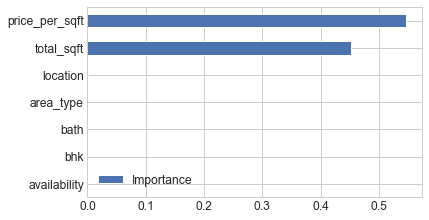

In [230]:
# Using Random Forest to gain an insight on Feature Importance
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(clean_data1.drop(['price'], axis=1), clean_data1['price'])

plt.style.use('seaborn-whitegrid')
importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=clean_data1.drop('price', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(6,len(importance)/2));


Elapsed time to compute the importances: 0.016 seconds


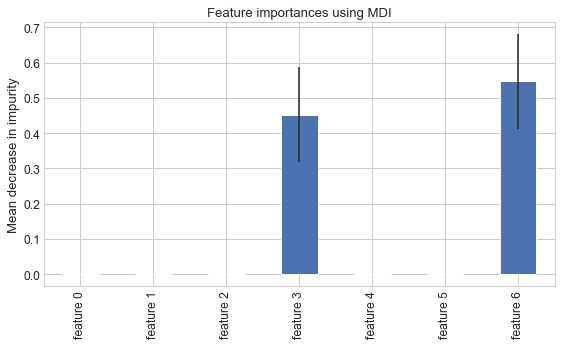

In [231]:
import time
start_time = time.time()
feature_names = [f"feature {i}" for i in range(clean_data1.drop(['price'], axis=1).shape[1])]
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


# Data Pre-processing

In [232]:
# Checking missing value
clean_data.isnull().sum()

area_type         0
availability      0
location          0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

<AxesSubplot:>

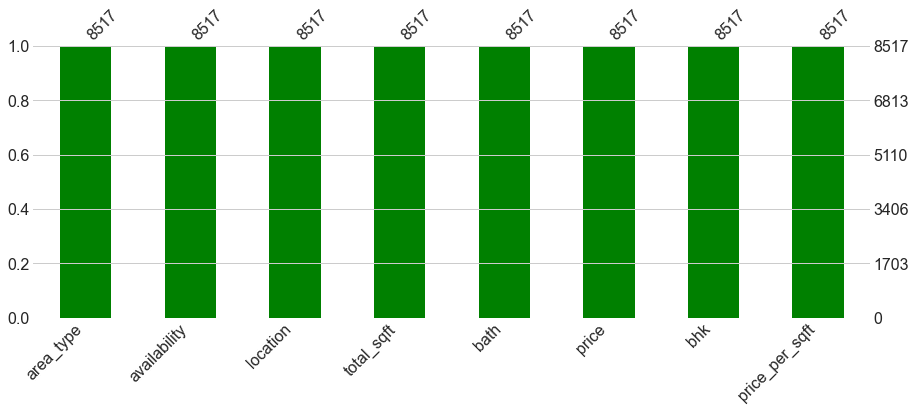

In [233]:
# Visualizing the missing values
msno.bar(clean_data,figsize=(15,5), color="green")

In [234]:
for i in clean_data.columns:
    print("******************************", i, "******************************************")
    print()
    print(set(clean_data[i].tolist()))
    print()

****************************** area_type ******************************************

{'Built-up  Area', 'Plot  Area', 'Carpet  Area', 'Super built-up  Area'}

****************************** availability ******************************************

{'Ready To Move', 'Soon to be Vacated'}

****************************** location ******************************************

{'Vishveshwarya Layout', 'Kanakapura', 'Sompura', 'Kogilu', 'Sarjapura - Attibele Road', 'Bannerghatta Road', 'Billekahalli', 'Cooke Town', 'Karuna Nagar', 'LB Shastri Nagar', 'Pattandur Agrahara', 'Nagavarapalya', 'Bommasandra Industrial Area', 'Arekere', 'Kothanur', 'Jalahalli', 'Electronics City Phase 1', 'Marsur', 'Shampura', 'Kenchenahalli', 'Ananth Nagar', 'Hebbal', 'NGR Layout', 'Kadubeesanahalli', 'Kumaraswami Layout', 'Sanjay nagar', 'Chikkabanavar', 'Electronic City Phase II', 'Indira Nagar', 'Cox Town', 'Channasandra', 'Margondanahalli', 'Tumkur Road', 'Hebbal Kempapura', 'Babusapalaya', 'Hoodi', 'Horamavu Aga

{6529.850746268657, 6531.365313653137, 6540.540540540541, 6586.826347305389, 6590.909090909091, 6608.695652173913, 6612.021857923497, 500.0, 556.3061671044704, 6626.984126984127, 6626.506024096386, 6631.578947368421, 6706.408345752608, 6717.948717948718, 6722.689075630252, 6723.584108199494, 6727.480045610034, 6734.693877551021, 1166.6666666666667, 6761.167583698592, 6764.325721671693, 6766.528925619835, 3999.9999999999995, 6769.2307692307695, 6781.429316640584, 1363.6363636363637, 1400.0, 1640.625, 1666.6666666666667, 6858.638743455497, 6864.337936636881, 1813.953488372093, 1875.0, 1900.0, 6899.923017705928, 2000.0, 2090.909090909091, 2127.659574468085, 6936.363636363636, 2153.846153846154, 2181.818181818182, 2200.0, 2300.0, 2303.5363457760313, 2320.0, 2323.684210526316, 2332.089552238806, 2333.3333333333335, 2341.176470588235, 6988.934187536401, 2399.7517070142767, 2400.0, 2406.639004149378, 2416.6666666666665, 2434.782608695652, 6997.084548104956, 2439.0243902439024, 2444.4444444444

### Splitting Data into Dependent and Independent Variables

In [235]:
x= clean_data.drop(columns='price',axis=1)
y= clean_data[['price']]
print(x.shape)
print(y.shape)


(8517, 7)
(8517, 1)


###  Data Splitting

In [236]:
## Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  

In [237]:
print(x_train.shape)
x_train.head()

(6813, 7)


area_type        availability           location  \
850    Super built-up  Area  Soon to be Vacated  Bannerghatta Road   
3854         Built-up  Area       Ready To Move             Hebbal   
1190         Built-up  Area       Ready To Move            Varthur   
10706  Super built-up  Area  Soon to be Vacated              Other   
3562             Plot  Area       Ready To Move              Other   

       total_sqft  bath  bhk  price_per_sqft  
850        1122.5     2    2     5250.334076  
3854        919.0     2    2     5331.882481  
1190       1024.0     2    2     4101.562500  
10706       720.0     1    1     4498.611111  
3562       1200.0     4    4    12500.000000

In [238]:
print(x_test.shape)
x_test.head()

(1704, 7)


area_type        availability     location  total_sqft  \
11697  Super built-up  Area  Soon to be Vacated   Begur Road       644.0   
6716         Built-up  Area       Ready To Move        Other       450.0   
3978   Super built-up  Area       Ready To Move    Ardendale      3198.0   
1703   Super built-up  Area       Ready To Move  Kathriguppe      1245.0   
1335   Super built-up  Area  Soon to be Vacated   Whitefield      1280.0   

       bath  bhk  price_per_sqft  
11697     1    1     4968.944099  
6716      1    1    13333.333333  
3978      4    4     7817.385866  
1703      2    3     5500.401606  
1335      2    2     5859.375000

In [239]:
for i in x_train.columns:
    print("******************************", i, "******************************************")
    print()
    print(set(x_train[i].tolist()))
    print()

****************************** area_type ******************************************

{'Built-up  Area', 'Plot  Area', 'Carpet  Area', 'Super built-up  Area'}

****************************** availability ******************************************

{'Ready To Move', 'Soon to be Vacated'}

****************************** location ******************************************

{'Vishveshwarya Layout', 'Kanakapura', 'Sompura', 'Kogilu', 'Cooke Town', 'Bannerghatta Road', 'Billekahalli', 'Karuna Nagar', 'LB Shastri Nagar', 'Sarjapura - Attibele Road', 'Pattandur Agrahara', 'Nagavarapalya', 'Jalahalli', 'Arekere', 'Kothanur', 'Marsur', 'Electronics City Phase 1', 'Bommasandra Industrial Area', 'Shampura', 'Kenchenahalli', 'Ananth Nagar', 'Hebbal', 'NGR Layout', 'Kadubeesanahalli', 'Kumaraswami Layout', 'Sanjay nagar', 'Chikkabanavar', 'Electronic City Phase II', 'Cox Town', 'Indira Nagar', 'Channasandra', 'Margondanahalli', 'Tumkur Road', 'Hebbal Kempapura', 'Babusapalaya', 'Hoodi', 'Horamavu Aga

In [240]:
for i in x_test.columns:
    print("******************************", i, "******************************************")
    print()
    print(set(x_test[i].tolist()))
    print()

****************************** area_type ******************************************

{'Built-up  Area', 'Carpet  Area', 'Super built-up  Area', 'Plot  Area'}

****************************** availability ******************************************

{'Ready To Move', 'Soon to be Vacated'}

****************************** location ******************************************

{'Vishveshwarya Layout', 'Kanakapura', 'Sompura', 'Kogilu', 'Cooke Town', 'Bannerghatta Road', 'LB Shastri Nagar', 'Sarjapura - Attibele Road', 'Billekahalli', 'Pattandur Agrahara', 'Nagavarapalya', 'Jalahalli', 'Arekere', 'Kothanur', 'Bommasandra Industrial Area', 'Electronics City Phase 1', 'Shampura', 'Kenchenahalli', 'Ananth Nagar', 'Hebbal', 'NGR Layout', 'Kadubeesanahalli', 'Kumaraswami Layout', 'Sanjay nagar', 'Chikkabanavar', 'Electronic City Phase II', 'Indira Nagar', 'Cox Town', 'Channasandra', 'Margondanahalli', 'Tumkur Road', 'Hebbal Kempapura', 'Babusapalaya', 'Hoodi', 'Horamavu Agara', 'Vijayanagar', 'AECS 

<AxesSubplot:>

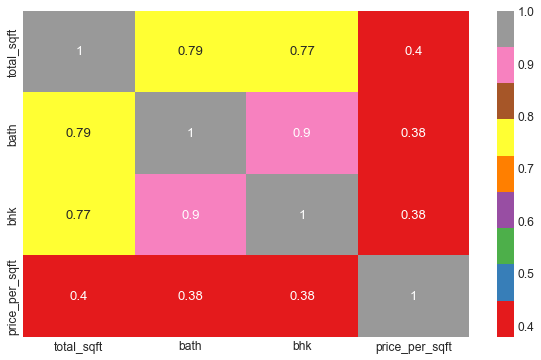

In [241]:
# Selecting our features wisely to avoid overfitting
# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(x_train.corr(), annot=True, cmap=sns.color_palette("Set1"))

In [242]:
x_train.head()

area_type        availability           location  \
850    Super built-up  Area  Soon to be Vacated  Bannerghatta Road   
3854         Built-up  Area       Ready To Move             Hebbal   
1190         Built-up  Area       Ready To Move            Varthur   
10706  Super built-up  Area  Soon to be Vacated              Other   
3562             Plot  Area       Ready To Move              Other   

       total_sqft  bath  bhk  price_per_sqft  
850        1122.5     2    2     5250.334076  
3854        919.0     2    2     5331.882481  
1190       1024.0     2    2     4101.562500  
10706       720.0     1    1     4498.611111  
3562       1200.0     4    4    12500.000000

In [243]:
x_train["availability"].value_counts()

Ready To Move         5367
Soon to be Vacated    1446
Name: availability, dtype: int64

## Encoding

In [244]:
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(drop_last=True)
x_train = ohe_enc.fit_transform(x_train)
x_test = ohe_enc.transform(x_test)


In [245]:
print(x_train.shape)
x_train.head()

(6813, 249)


total_sqft  bath  bhk  price_per_sqft  area_type_Super built-up  Area  \
850        1122.5     2    2     5250.334076                               1   
3854        919.0     2    2     5331.882481                               0   
1190       1024.0     2    2     4101.562500                               0   
10706       720.0     1    1     4498.611111                               1   
3562       1200.0     4    4    12500.000000                               0   

       area_type_Built-up  Area  area_type_Plot  Area  \
850                           0                     0   
3854                          1                     0   
1190                          1                     0   
10706                         0                     0   
3562                          0                     1   

       availability_Soon to be Vacated  location_Bannerghatta Road  \
850                                  1                           1   
3854                                 0                           0   
1190                                 0                           0   
10706                                1                           0   
3562                                 0                           0   

       location_Hebbal  location_Varthur  location_Other  \
850                  0                 0               0   
3854                 1                 0               0   
1190                 0                 1               0   
10706                0                 0               1   
3562                 0                 0               1   

       location_Kammanahalli  location_Anandapura  location_Kaikondrahalli  \
850                        0                    0                        0   
3854                       0                    0                        0   
1190                       0                    0                        0   
10706                      0                    0                        0   
3562                       0                    0                        0   

       location_Whitefield  location_Talaghattapura  location_Kodihalli  \
850                      0                        0                   0   
3854                     0                        0                   0   
1190                     0                        0                   0   
10706                    0                        0                   0   
3562                     0                        0                   0   

       location_Kannamangala  location_Sarjapur  Road  location_Rachenahalli  \
850                        0                        0                      0   
3854                       0                        0                      0   
1190                       0                        0                      0   
10706                      0                        0                      0   
3562                       0                        0                      0   

       location_Kanakpura Road  location_Thigalarapalya  location_Munnekollal  \
850                          0                        0                     0   
3854                         0                        0                     0   
1190                         0                        0                     0   
10706                        0                        0                     0   
3562                         0                        0                     0   

       location_Margondanahalli  location_Hosur Road  location_Neeladri Nagar  \
850                           0                    0                        0   
3854                          0                    0                        0   
1190                          0                    0                        0   
10706                         0                    0                        0   
3562                          0                    0                        0   

       location_Hegde Naga

In [246]:
print(x_test.shape)
x_test.head()

(1704, 249)


total_sqft  bath  bhk  price_per_sqft  area_type_Super built-up  Area  \
11697       644.0     1    1     4968.944099                               1   
6716        450.0     1    1    13333.333333                               0   
3978       3198.0     4    4     7817.385866                               1   
1703       1245.0     2    3     5500.401606                               1   
1335       1280.0     2    2     5859.375000                               1   

       area_type_Built-up  Area  area_type_Plot  Area  \
11697                         0                     0   
6716                          1                     0   
3978                          0                     0   
1703                          0                     0   
1335                          0                     0   

       availability_Soon to be Vacated  location_Bannerghatta Road  \
11697                                1                           0   
6716                                 0                           0   
3978                                 0                           0   
1703                                 0                           0   
1335                                 1                           0   

       location_Hebbal  location_Varthur  location_Other  \
11697                0                 0               0   
6716                 0                 0               1   
3978                 0                 0               0   
1703                 0                 0               0   
1335                 0                 0               0   

       location_Kammanahalli  location_Anandapura  location_Kaikondrahalli  \
11697                      0                    0                        0   
6716                       0                    0                        0   
3978                       0                    0                        0   
1703                       0                    0                        0   
1335                       0                    0                        0   

       location_Whitefield  location_Talaghattapura  location_Kodihalli  \
11697                    0                        0                   0   
6716                     0                        0                   0   
3978                     0                        0                   0   
1703                     0                        0                   0   
1335                     1                        0                   0   

       location_Kannamangala  location_Sarjapur  Road  location_Rachenahalli  \
11697                      0                        0                      0   
6716                       0                        0                      0   
3978                       0                        0                      0   
1703                       0                        0                      0   
1335                       0                        0                      0   

       location_Kanakpura Road  location_Thigalarapalya  location_Munnekollal  \
11697                        0                        0                     0   
6716                         0                        0                     0   
3978                         0                        0                     0   
1703                         0                        0                     0   
1335                         0                        0                     0   

       location_Margondanahalli  location_Hosur Road  location_Neeladri Nagar  \
11697                         0                    0                        0   
6716                          0                    0                        0   
3978                          0                    0                        0   
1703                          0                    0                        0   
1335                          0                    0                        0   

       location_Hegde Naga

## Data Scaling

In [247]:
# Importing StandardScaler for Data Scaling
from sklearn.preprocessing import StandardScaler

# Creating object
std_scaler = StandardScaler().set_output(transform="pandas")


# Fit and Transform
x_train[["total_sqft", "price_per_sqft", "bath", "bhk"]]= std_scaler.fit_transform(x_train[["total_sqft", "price_per_sqft", "bath", "bhk"]])
x_test[["total_sqft", "price_per_sqft", "bath", "bhk"]]= std_scaler.transform(x_test[["total_sqft", "price_per_sqft", "bath", "bhk"]])


In [248]:
x_train.head()

total_sqft      bath       bhk  price_per_sqft  \
850     -0.509286 -0.474037 -0.558767       -0.431073   
3854    -0.797357 -0.474037 -0.558767       -0.402147   
1190    -0.648721 -0.474037 -0.558767       -0.838557   
10706   -1.079058 -1.482347 -1.601463       -0.697719   
3562    -0.399578  1.542582  1.526624        2.140477   

       area_type_Super built-up  Area  area_type_Built-up  Area  \
850                                 1                         0   
3854                                0                         1   
1190                                0                         1   
10706                               1                         0   
3562                                0                         0   

       area_type_Plot  Area  availability_Soon to be Vacated  \
850                       0                                1   
3854                      0                                0   
1190                      0                                0   
10706                     0                                1   
3562                      1                                0   

       location_Bannerghatta Road  location_Hebbal  location_Varthur  \
850                             1                0                 0   
3854                            0                1                 0   
1190                            0                0                 1   
10706                           0                0                 0   
3562                            0                0                 0   

       location_Other  location_Kammanahalli  location_Anandapura  \
850                 0                      0                    0   
3854                0                      0                    0   
1190                0                      0                    0   
10706               1                      0                    0   
3562                1                      0                    0   

       location_Kaikondrahalli  location_Whitefield  location_Talaghattapura  \
850                          0                    0                        0   
3854                         0                    0                        0   
1190                         0                    0                        0   
10706                        0                    0                        0   
3562                         0                    0                        0   

       location_Kodihalli  location_Kannamangala  location_Sarjapur  Road  \
850                     0                      0                        0   
3854                    0                      0                        0   
1190                    0                      0                        0   
10706                   0                      0                        0   
3562                    0                      0                        0   

       location_Rachenahalli  location_Kanakpura Road  \
850                        0                        0   
3854                       0                        0   
1190                       0                        0   
10706                      0                        0   
3562                       0                        0   

       location_Thigalarapalya  location_Munnekollal  \
850                          0                     0   
3854                         0                     0   
1190                         0                     0   
10706                        0                     0   
3562                         0                     0   

       location_Margondanahalli  location_Hosur Road  location_Neeladri Nagar  \
850                           0                    0                        0   
3854                          0                    0                        0   
1190                          0                    0                        0   
10706                         0                    0                        0   

In [249]:
x_test.head()

total_sqft      bath       bhk  price_per_sqft  \
11697   -1.186643 -1.482347 -1.601463       -0.530886   
6716    -1.461266 -1.482347 -1.601463        2.436071   
3978     2.428759  1.542582  1.526624        0.479493   
1703    -0.335876 -0.474037  0.483928       -0.342371   
1335    -0.286331 -0.474037 -0.558767       -0.215038   

       area_type_Super built-up  Area  area_type_Built-up  Area  \
11697                               1                         0   
6716                                0                         1   
3978                                1                         0   
1703                                1                         0   
1335                                1                         0   

       area_type_Plot  Area  availability_Soon to be Vacated  \
11697                     0                                1   
6716                      0                                0   
3978                      0                                0   
1703                      0                                0   
1335                      0                                1   

       location_Bannerghatta Road  location_Hebbal  location_Varthur  \
11697                           0                0                 0   
6716                            0                0                 0   
3978                            0                0                 0   
1703                            0                0                 0   
1335                            0                0                 0   

       location_Other  location_Kammanahalli  location_Anandapura  \
11697               0                      0                    0   
6716                1                      0                    0   
3978                0                      0                    0   
1703                0                      0                    0   
1335                0                      0                    0   

       location_Kaikondrahalli  location_Whitefield  location_Talaghattapura  \
11697                        0                    0                        0   
6716                         0                    0                        0   
3978                         0                    0                        0   
1703                         0                    0                        0   
1335                         0                    1                        0   

       location_Kodihalli  location_Kannamangala  location_Sarjapur  Road  \
11697                   0                      0                        0   
6716                    0                      0                        0   
3978                    0                      0                        0   
1703                    0                      0                        0   
1335                    0                      0                        0   

       location_Rachenahalli  location_Kanakpura Road  \
11697                      0                        0   
6716                       0                        0   
3978                       0                        0   
1703                       0                        0   
1335                       0                        0   

       location_Thigalarapalya  location_Munnekollal  \
11697                        0                     0   
6716                         0                     0   
3978                         0                     0   
1703                         0                     0   
1335                         0                     0   

       location_Margondanahalli  location_Hosur Road  location_Neeladri Nagar  \
11697                         0                    0                        0   
6716                          0                    0                        0   
3978                          0                    0                        0   
1703                          0                    0                        0   

# ML Model Training

## 1)Linear Regression

In [250]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)

In [251]:
# Training score
print(f"Training score : {linear_model.score(x_train, y_train)}")
# Test score
print(f"Test score : {linear_model.score(x_test, y_test)}")

Training score : 0.9435305967721422
Test score : 0.9359716173533614


In [252]:
# Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9359716173533614

In [253]:
#Adjusted  r-square value 
1 - (1-linear_model.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9250066467350582

In [254]:
# Adjusted r-square
Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_r2

0.9250066467350582

In [255]:
# Intercept
linear_model.intercept_


array([125.9145777])

In [256]:
# Coefficient
linear_model.coef_


array([[ 65.41991832,  -2.92265545, -10.08476409,  49.74230646,
          1.57598849,  -1.6489206 ,  -0.30007993,   0.43082257,
        -22.75462074, -24.23747682, -18.53589257, -23.59870343,
        -26.81880508, -15.24391397, -16.50728242, -26.87409854,
        -28.87042479, -16.98970081, -23.34349626, -29.4330619 ,
        -23.08901579, -27.76868563, -36.8179782 , -17.33266706,
        -23.09602819, -28.64119242, -11.9503951 , -25.60445308,
        -26.84882959, -26.37755236, -21.50834954, -16.03331406,
        -24.38253876, -25.72606138, -19.52971332, -17.50489671,
        -26.21790413, -18.75166441, -14.81630479, -15.85379918,
         -5.32733822, -33.26257404,   4.36055369,  -8.35116259,
        -25.90510073, -31.17073215,   3.39526623, -15.3021792 ,
        -16.62118574,  -1.3833906 , -31.35444406, -35.42399822,
        -30.95765897, -44.61194264, -20.8811585 , -24.66016434,
        -35.69027477, -20.58262614, -17.34766149, -27.09385977,
        -25.77821931, -27.73861532, -24.

In [257]:
# Predict model with test data
y_pred = linear_model.predict(x_test)
y_pred


array([[ 25.4864503 ],
       [146.72962104],
       [258.60845509],
       ...,
       [ 12.65768013],
       [ 94.80649335],
       [307.6964135 ]])

In [258]:
y_pred = pd.DataFrame(y_pred, columns=["price"])
y_pred.head()


price
0   25.486450
1  146.729621
2  258.608455
3   63.495284
4   78.639518

In [259]:
y_test.head()

price
11697   32.00
6716    60.00
3978   250.00
1703    68.48
1335    75.00

In [260]:
x.columns

Index(['area_type', 'availability', 'location', 'total_sqft', 'bath', 'bhk',
       'price_per_sqft'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

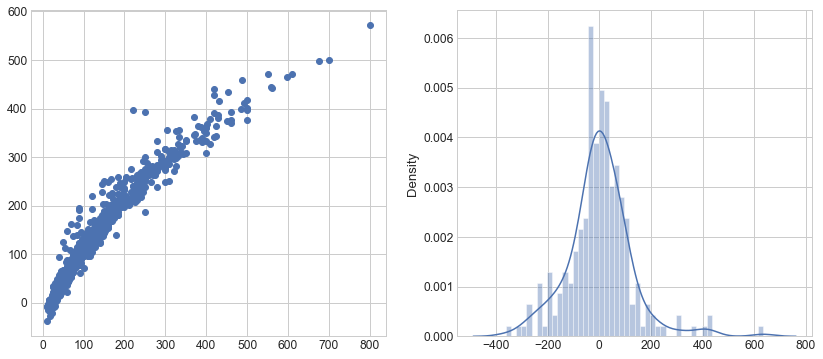

In [261]:
# Check normality
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, cmap=sns.color_palette("Set1"))



plt.subplot(1,2,2)
sns.distplot((y_test - y_pred), bins=50)


## 2)OLS (Ordinary Least Square) method 

In [262]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [263]:
reg_model = smf.OLS(endog = y_train, exog=x_train).fit()


In [264]:
reg_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1051.
Date:                Mon, 04 Mar 2024   Prob (F-statistic):                        0.00
Time:                        03:26:15   Log-Likelihood:                         -30511.
No. Observations:                6813   AIC:                                  6.152e+04
Df Residuals:                    6564   BIC:                                  6.322e+04
Df Model:                         249                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
total_sqft                              65.4466      0.467    140.197      0.000      64.532      66.362
bath                                    -3.0590      0.672     -4.553      0.000      -4.376      -1.742
bhk                                     -9.9415      0.664    -14.963      0.000     -11.244      -8.639
price_per_sqft                          49.8019      0.401    124.227      0.000      49.016      50.588
area_type_Super built-up  Area          18.8761      3.057      6.176      0.000      12.884      24.868
area_type_Built-up  Area                15.6402      3.102      5.043      0.000       9.560      21.720
area_type_Plot  Area                    17.1607      3.177      5.402      0.000      10.933      23.388
availability_Soon to be Vacated          0.7817      0.742      1.054      0.292      -0.673       2.236
location_Bannerghatta Road              85.7790      3.805     22.547      0.000      78.321      93.237
location_Hebbal                         84.4800      3.673     22.999      0.000      77.279      91.681
location_Varthur                        89.9769      4.319     20.832      0.000      81.510      98.444
location_Other                          85.0495      3.120     27.257      0.000      78.933      91.166
location_Kammanahalli                   81.6812      7.523     10.857      0.000      66.934      96.429
location_Anandapura                     93.2890      6.244     14.941      0.000      81.049     105.529
location_Kaikondrahalli                 91.9892      6.568     14.005      0.000      79.113     104.865
location_Whitefield                     81.5490      3.383     24.108      0.000      74.918      88.180
location_Talaghattapura                 79.5194      4.979     15.972      0.000      69.760      89.279
location_Kodihalli                      91.5741      8.281     11.059      0.000      75.341     107.807
location_Kannamangala                   85.1422      7.235     11.769      0.000      70.960      99.325
location_Sarjapur  Road                 79.0696      3.423     23.102      0.000      72.360      85.779
location_Rachenahalli                   85.5076      4.598     18.595      0.000      76.493      94.522
location_Kanakpura Road                 81.7141      3.820     21.388      0.000      74.225      89.203
location_Thigalarapalya                 71.8264      4.788     15.001      0.000      62.440      81.213
location_Munnekollal                    91.2020      6.984     13.060      0.000      77.512     104.892
location_Margondanahalli                85.4004      6.128     13.935      0.000      73.387      97.414
location_Hosur Road                     79.8

In [265]:
ols
score = 0.976
r = 0.976
adj = 0.975

<AxesSubplot:ylabel='Density'>

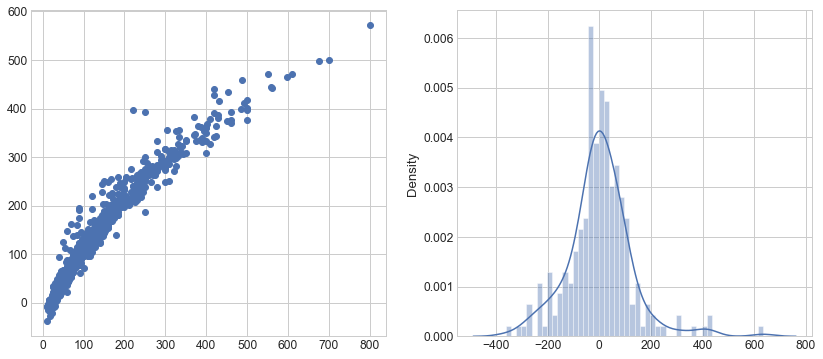

In [266]:
# Check normality
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, cmap=sns.color_palette("Set1"))



plt.subplot(1,2,2)
sns.distplot((y_test - y_pred), bins=50)


## 3)Ridge

In [267]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)
r2_score(y_test, y_pred_ridge)

0.9361108569074031

In [268]:
# Training score
print(f"Training score : {ridge_reg.score(x_train, y_train)}")
# Test score
print(f"Test score : {ridge_reg.score(x_test, y_test)}")

Training score : 0.943489361732136
Test score : 0.9361108569074031


In [269]:
# Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_ridge)



0.9361108569074031

In [270]:
# Adjusted r-square
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_ridge)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_r2

0.9251697313021372

In [271]:
y_pred = pd.DataFrame(y_pred_ridge, columns=["price"])
y_pred.head()


price
0   25.492791
1  146.690112
2  258.680588
3   63.527281
4   78.647125

In [272]:
ridge_reg.coef_


array([[ 6.54330752e+01, -2.94982681e+00, -1.00636718e+01,
         4.97343157e+01,  1.61197634e+00, -1.61183384e+00,
        -2.24592014e-01,  4.52200781e-01, -5.20813002e+00,
        -6.69395458e+00, -1.00094517e+00, -6.05799861e+00,
        -9.18959560e+00,  2.27108315e+00,  1.02544688e+00,
        -9.33779575e+00, -1.13027554e+01,  5.63588744e-01,
        -5.75008424e+00, -1.18869084e+01, -5.53206652e+00,
        -1.02206694e+01, -1.92046952e+01,  2.02933114e-01,
        -5.54581869e+00, -1.10702053e+01,  5.53499914e+00,
        -8.03378022e+00, -9.23772660e+00, -8.80607928e+00,
        -3.94292548e+00,  1.50175931e+00, -6.80637862e+00,
        -8.17454290e+00, -1.98783053e+00,  3.12126363e-02,
        -8.63000386e+00, -1.20378649e+00,  2.70635289e+00,
         1.67550487e+00,  1.21445864e+01, -1.56039199e+01,
         2.17914385e+01,  9.14258673e+00, -8.34933339e+00,
        -1.34666891e+01,  2.08767653e+01,  2.23481133e+00,
         9.18030269e-01,  1.60660891e+01, -1.37685883e+0

<AxesSubplot:ylabel='Density'>

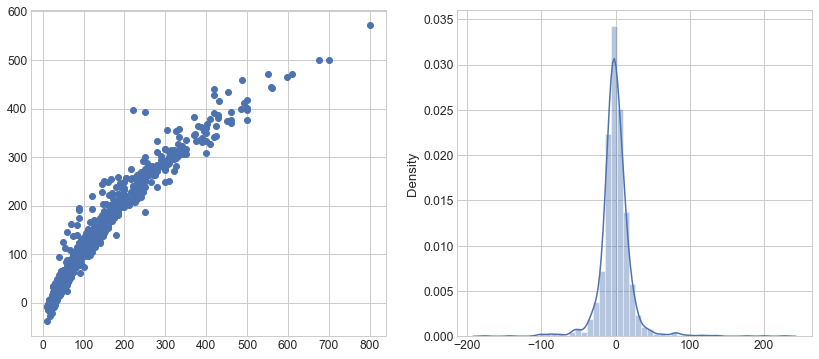

In [273]:
# Check normality
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_ridge, cmap=sns.color_palette("Set1"))



plt.subplot(1,2,2)
sns.distplot((y_test - y_pred_ridge), bins=50)


## 4) Lasso

In [274]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
y_pred_lasso = lasso_reg.predict(x_test)
r2_score(y_test, y_pred_lasso)

0.933251276395576

In [275]:
# Training score
print(f"Training score : {lasso_reg.score(x_train, y_train)}")
# Test score
print(f"Test score : {lasso_reg.score(x_test, y_test)}")




Training score : 0.9365431627097252
Test score : 0.933251276395576


In [276]:
# Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lasso)


0.933251276395576

In [277]:
# Adjusted r-square
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_lasso)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_r2

0.921820442710912

In [278]:
y_pred_lasso = pd.DataFrame(y_pred_ridge, columns=["price"])
y_pred_lasso.head()

price
0   25.492791
1  146.690112
2  258.680588
3   63.527281
4   78.647125

<AxesSubplot:ylabel='Density'>

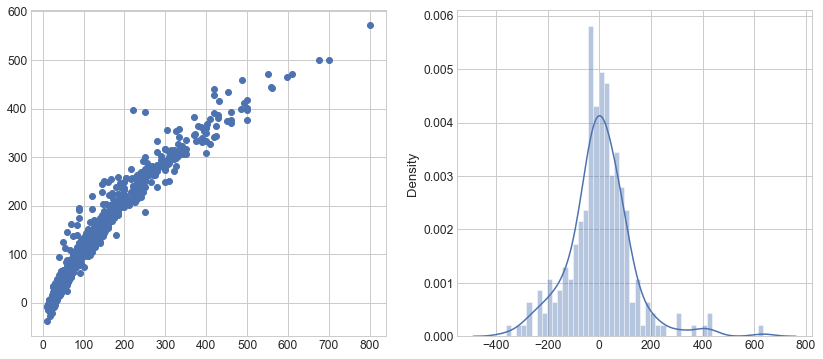

In [279]:
# Check normality
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lasso, cmap=sns.color_palette("Set1"))



plt.subplot(1,2,2)
sns.distplot((y_test - y_pred_lasso), bins=50)


## 5) ElasticNet

In [280]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet


elastic_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_reg.fit(x_train, y_train)
y_pred_elastic = elastic_reg.predict(x_test)
r2_score(y_test, y_pred_elastic)

0.9306167605704506

In [281]:
# Training score
print(f"Training score : {elastic_reg.score(x_train, y_train)}")
# Test score
print(f"Test score : {elastic_reg.score(x_test, y_test)}")




Training score : 0.9326006820731124
Test score : 0.9306167605704506


In [282]:

# Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_elastic)


0.9306167605704506

In [283]:

# Adjusted r-square
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_elastic)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_r2



0.9187347615209611

In [284]:
y_pred_elastic = pd.DataFrame(y_pred_ridge, columns=["price"])
y_pred_elastic.head()

price
0   25.492791
1  146.690112
2  258.680588
3   63.527281
4   78.647125

<AxesSubplot:ylabel='Density'>

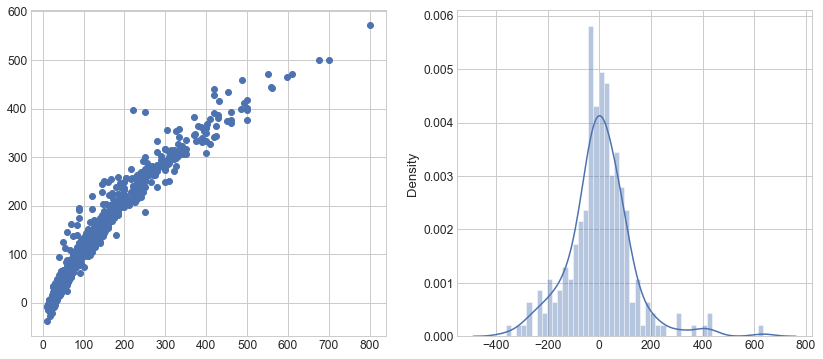

In [285]:
# Check normality
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_elastic, cmap=sns.color_palette("Set1"))



plt.subplot(1,2,2)
sns.distplot((y_test - y_pred_elastic), bins=50)


## 6)Decision Tree Regressior

In [286]:
from sklearn.tree import DecisionTreeClassifier
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
y_pred_dt = dt_reg.predict(x_test)
dt_reg.score(x_test, y_test)

0.9958090437737479

In [287]:
print(f"Training score : {dt_reg.score(x_train, y_train)}")
print("*"*50)
print(f"Test score : {dt_reg.score(x_test, y_test)}")


Training score : 1.0
**************************************************
Test score : 0.9958090437737479


In [288]:

# Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_dt)





0.9958090437737479

In [289]:

# Adjusted r-square
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_dt)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_r2


0.995091335314094

In [290]:
y_pred_dt = pd.DataFrame(y_pred_dt, columns=["price"])
y_pred_dt.head()


price
0   32.15
1   48.00
2  250.00
3   68.75
4   75.00

In [291]:
y_test.head()

price
11697   32.00
6716    60.00
3978   250.00
1703    68.48
1335    75.00

In [292]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(dt_reg, out_file ='tree.dot', 
               feature_names = x_train.columns )  

<AxesSubplot:ylabel='Density'>

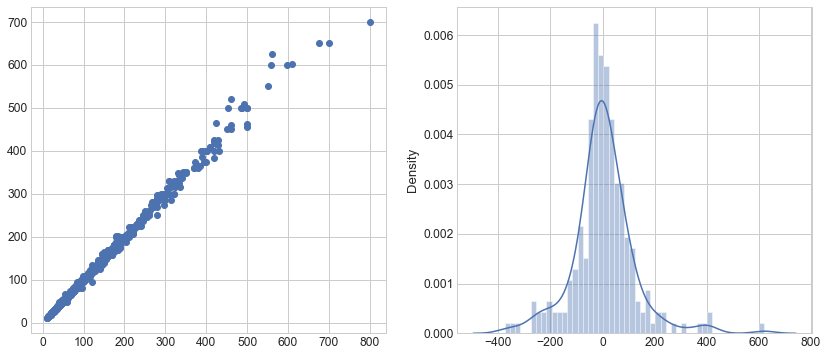

In [293]:
# Check normality
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_dt, cmap=sns.color_palette("Set1"))



plt.subplot(1,2,2)
sns.distplot((y_test - y_pred_dt), bins=50)


## 7) Random Forest Regression

In [294]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)
rf_reg.score(x_test, y_test)

0.9978402027123623

In [295]:
print(f"Training score : {rf_reg.score(x_train, y_train)}")
print("*"*50)
print(f"Test score : {rf_reg.score(x_test, y_test)}")


Training score : 0.9995642920261648
**************************************************
Test score : 0.9978402027123623


In [296]:

# Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rf)


0.9978402027123623

In [297]:
# Adjusted r-square
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_rf)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_r2


0.9974703337133102

In [298]:
y_pred_rf = pd.DataFrame(y_pred_rf, columns=["price"])
y_pred_rf.head()


price
0   31.4523
1   65.5180
2  255.4200
3   68.4096
4   74.9600

In [299]:
y_test.head()

price
11697   32.00
6716    60.00
3978   250.00
1703    68.48
1335    75.00

In [300]:
# Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rf)

0.9978402027123623

<AxesSubplot:ylabel='Density'>

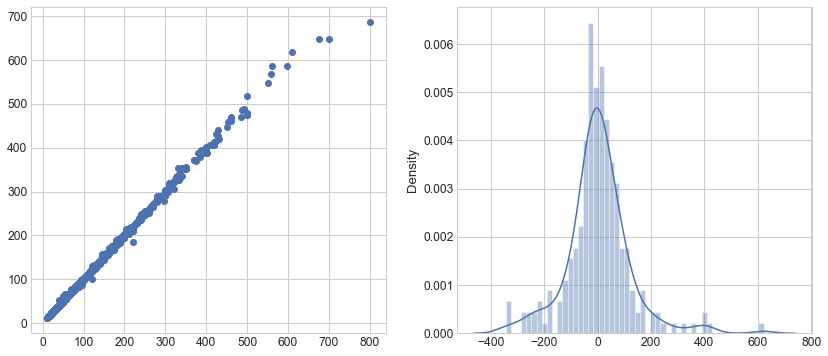

In [301]:
# Check normality
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_rf, cmap=sns.color_palette("Set1"))



plt.subplot(1,2,2)
sns.distplot((y_test - y_pred_rf), bins=50)


Elapsed time to compute the importances: 0.016 seconds


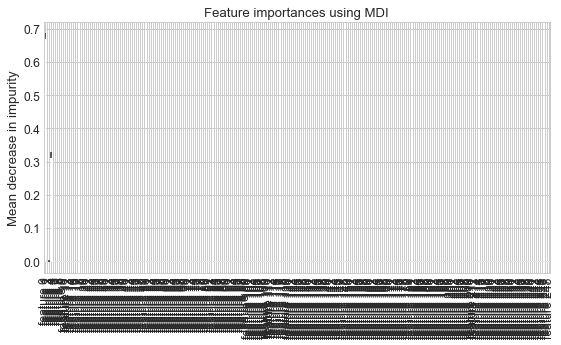

In [302]:
import time
start_time = time.time()
feature_names = [f"feature {i}" for i in range(x_train.shape[1])]
importances = rf_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


## 8) AdaBoostRegressor

In [303]:
from sklearn.ensemble import AdaBoostRegressor

ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(x_train, y_train)
y_pred_ada = ab_reg.predict(x_test)
ab_reg.score(x_test, y_test)

0.9379154847251681

In [304]:
print(f"Training score : {ab_reg.score(x_train, y_train)}")
print("*"*50)
print(f"Test score : {ab_reg.score(x_test, y_test)}")


Training score : 0.941676369462787
**************************************************
Test score : 0.9379154847251681


In [305]:

# Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_ada)


0.9379154847251681

In [306]:
# Adjusted r-square
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_ada)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_r2


0.927283404736562

In [307]:
y_pred_ada = pd.DataFrame(y_pred_ada, columns=["price"])
y_pred_ada.head()


price
0   61.307966
1  153.205663
2  285.426997
3   67.373702
4   74.185514

In [308]:
y_test.head()

price
11697   32.00
6716    60.00
3978   250.00
1703    68.48
1335    75.00

<AxesSubplot:ylabel='Density'>

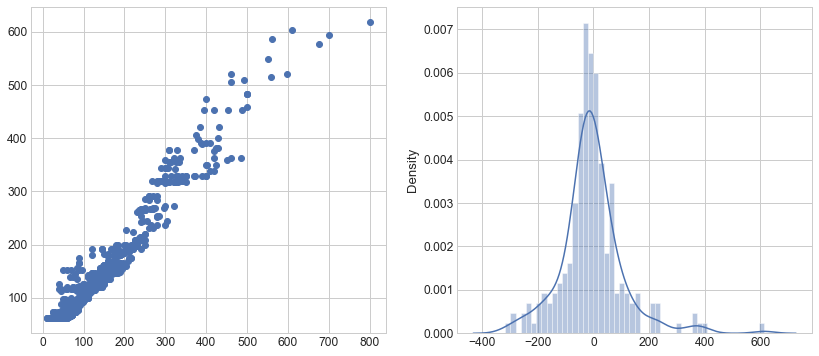

In [309]:
# Check normality
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_ada, cmap=sns.color_palette("Set1"))



plt.subplot(1,2,2)
sns.distplot((y_test - y_pred_ada), bins=50)


## 9) GradientBoostingRegressor

In [310]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()
gb_reg.fit(x_train, y_train)
y_pred_gb = gb_reg.predict(x_test)
gb_reg.score(x_test, y_test)

0.9975480634580468

In [311]:
print(f"Training score : {gb_reg.score(x_train, y_train)}")
print("*"*50)
print(f"Test score : {gb_reg.score(x_test, y_test)}")


Training score : 0.9984570247077148
**************************************************
Test score : 0.9975480634580468


In [312]:

# Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_gb)


0.9975480634580468

In [313]:
# Adjusted r-square
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_gb)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_r2


0.9971281651093904

In [314]:
y_pred_gb = pd.DataFrame(y_pred_gb, columns=["price"])
y_pred_gb.head()


price
0   29.037326
1   68.097536
2  254.751007
3   66.773836
4   75.543043

In [315]:
y_test.head()

price
11697   32.00
6716    60.00
3978   250.00
1703    68.48
1335    75.00

<AxesSubplot:ylabel='Density'>

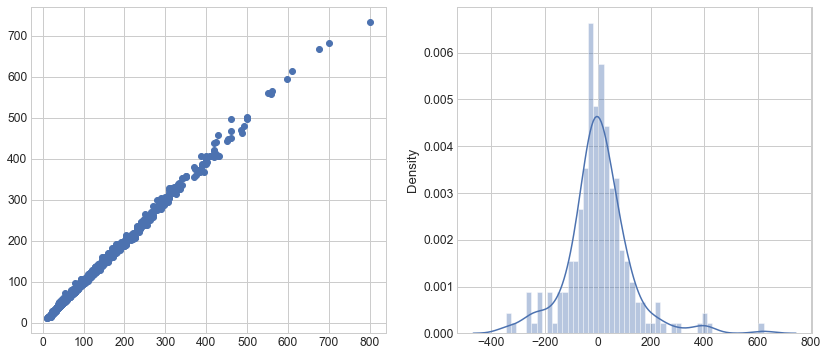

In [316]:
# Check normality
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_gb, cmap=sns.color_palette("Set1"))



plt.subplot(1,2,2)
sns.distplot((y_test - y_pred_gb), bins=50)


## 10) Support Vector Regression (SVR)


In [317]:
from sklearn.svm import SVR

supp_reg = SVR()
supp_reg.fit(x_train, y_train)
y_pred_supp = supp_reg.predict(x_test)
supp_reg.score(x_test, y_test)

0.7782378633761591

In [318]:
print(f"Training score : {supp_reg.score(x_train, y_train)}")
print("*"*50)
print(f"Test score : {supp_reg.score(x_test, y_test)}")


Training score : 0.7884140218459283
**************************************************
Test score : 0.7782378633761591


In [319]:

# Evaluation metrics to find accuracy/r-square value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_supp)


0.7782378633761591

In [320]:
# Adjusted r-square
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_supp)) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
Adj_r2


0.7402607161826678

In [321]:
y_pred_supp = pd.DataFrame(y_pred_supp, columns=["price"])
y_pred_supp.head()


price
0   32.972962
1  106.274947
2  242.493518
3   68.937858
4   74.693050

In [322]:
y_test.head()

price
11697   32.00
6716    60.00
3978   250.00
1703    68.48
1335    75.00

<AxesSubplot:ylabel='Density'>

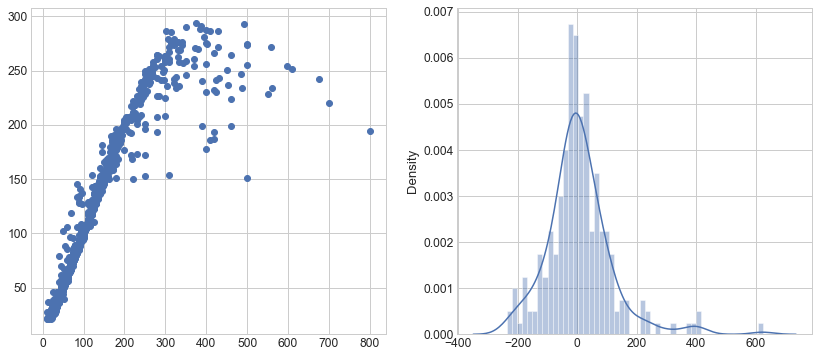

In [323]:
# Check normality
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_supp, cmap=sns.color_palette("Set1"))



plt.subplot(1,2,2)
sns.distplot((y_test - y_pred_supp), bins=50)


In [324]:
pd.DataFrame({"model":["LinearRegression", "OLS", "Ridge", "Lasso", "ElasticNet", "DecisionTreeClassifier", "RandomForestRegressor", "AdaBoostRegressor", "GradientBoostingRegressor", "SVR"], 
              "score":[0.9359,0.976,  0.9361, 0.9332,  0.9306, 0.9943,0.9978,0.9414,  0.9975, 0.7782],
             "r-squared":[0.9359, 0.976,  0.9361, 0.9332,  0.9306, 0.9943, 0.9978, 0.9414, 0.9975,  0.7782],
             "adjusted r-square":[0.9251, 0.975,  0.9361, 0.9251, 0.9187, 0.9933, 0.9975, 0.9314, 0.9971, 0.7402]})

model   score  r-squared  adjusted r-square
0           LinearRegression  0.9359     0.9359             0.9251
1                        OLS  0.9760     0.9760             0.9750
2                      Ridge  0.9361     0.9361             0.9361
3                      Lasso  0.9332     0.9332             0.9251
4                 ElasticNet  0.9306     0.9306             0.9187
5     DecisionTreeClassifier  0.9943     0.9943             0.9933
6      RandomForestRegressor  0.9978     0.9978             0.9975
7          AdaBoostRegressor  0.9414     0.9414             0.9314
8  GradientBoostingRegressor  0.9975     0.9975             0.9971
9                        SVR  0.7782     0.7782             0.7402